In [1]:
import numpy
import matplotlib
from matplotlib import pyplot
import pandas
import scipy
import scipy.stats
import scipy.integrate
import seaborn

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'

In [3]:
# Colors based on design method
seq_colors_dict = {
    'N50, MPRA, varying MRL': 'darkgoldenrod',
    'N50, MPRA, high MRL': 'tab:purple',
    'N25, MPRA, high MRL': 'purple',
    'N50, SeqProp': 'tab:blue',
    'N50, SeqProp+VAE': 'tab:green',
    'N25, SeqProp': 'tab:blue',
    'N25, SeqProp+VAE': 'tab:green',
    'N50, DEN': 'tab:red',
    'N50, DEN+VAE': 'tab:orange',
    'N50, DEN, varying MRL': 'gold',
    'N25, DEN': 'tab:red',
    'N25, DEN+VAE': 'tab:orange',
    'VAT1': 'lightgray',
    'LAMA5': 'darkgray',
    'Strong Kozak': 'dimgray',
}

seq_markers_dict = {
    'N50, MPRA, varying MRL': 'o',
    'N50, MPRA, high MRL': 'o',
    'N25, MPRA, high MRL': 's',
    'N50, SeqProp': 'o',
    'N50, SeqProp+VAE': 'o',
    'N25, SeqProp': 's',
    'N25, SeqProp+VAE': 's',
    'N50, DEN': 'o',
    'N50, DEN+VAE': 'o',
    'N50, DEN, varying MRL': 'o',
    'N25, DEN': 's',
    'N25, DEN+VAE': 's',
    'VAT1': 'v',
    'LAMA5': '^',
    'Strong Kozak': 'D',
}

# Load and preprocess data

In [4]:
counts_df = pandas.read_csv('data.csv').set_index('seq_name')
counts_df

seq  polprof_0  \
seq_name                                                                  
seq_1      AAGGGATGCCACCGTTTAAAGGATATCTCGGTATGGCCTGGGTAAG...        733   
seq_2      AACTCTAGAGTCAGGCATTCTGTGAAATGGACATGGGCGAAGTAGG...        656   
seq_3      ACAGCTCCTGCCAACGCAGAAGGCACCTATGCACTCTCGGACCGCG...        471   
seq_4      ACCGGCAAGGGGTCCGGGGGTCTCCAACGCAGGAGCACACCGCAAG...        512   
seq_5      ACAAGAGTGCAAGACACGCTCAGAAGTTAACAAAGACTTAGCGACA...        511   
seq_6      ACGAGCCGGAAACGGTACTCTAATTGGCATACACACCTAGCGCAAA...        497   
seq_7      AACGCAAACTTTGTCGTGCCTTAGGTAGAGGGTGACTACTTGCGGA...        626   
seq_8      ACCCACGGTGATAGTGCGAGTAGACAGAGGGACTTTTAGGCACATT...        389   
seq_13     ACCGGATATCCGGATTTAATAGATAGAAGATATAATAAGATAATTA...        504   
seq_14     ACCGTAATCCGTTTTATAGTGAGAGAGTAGTAATTTAAGTAGAGAA...        523   
seq_15     AACAGAGAGTTTTCTATAACGTAAATCCGTAGCTAAGTAAGTAGAA...        598   
seq_16     ACCCGTAACTTAATAATATCCGAGATTAGTAGCTAATTTAGCGAGT...        485   
seq_17     ACCCAGAGAATATAAATCATAGTATAGTAATCCAAGAGAGTAGAAG...        557   
seq_18     AGAGAGAGAGTTTATACCACAGAGTAACTTAACCCAATAATAACTA...        590   
seq_19     ACCCGGATAAAAAAACCCTGAGTGTAATCTAAGAGAATCGTAGAAA...        488   
seq_20     ACCCGTAGCGTAAAAAACAATTAGTAGAGAGAAATTATTGAGCGTA...        427   
seq_28     ATCGGAGAGAGAGAGAGAGAGAGAGAGAGATAAGTTCCTAACTGAT...        160   
seq_29     AGTCCCTGAACGTTTTCGGGGAGCGCACTAATCGTTTCTCACTGAT...        529   
seq_30     AAAGGAGAGAGAGAGAGAATCGGAGAGCACTAATCGTTCCACTAAC...        390   
seq_31     ATCTAGTTCTAGTAGATAAGTTCCACTAGAACCCTAACTGACTAGC...        720   
seq_32     AAAGTCCCTAATCGTTCCTAATCGGGGAGAGAGATAAGTTTCTGAT...        470   
seq_33     AGTTTTCTGGAGAAAGAGTCTAGAGCTAGCAGAGAGACCTTAAACC...        642   
seq_34     AGAGAGTTTTTATTCTTAAGTTTCGAAGTGAGAATCTCTAGAATTA...        641   
seq_35     ACATCCCGGTCGCCATGGCTGGGTGTCCCCATCCGCGTCCCCAACA...        449   
seq_36     ACATCAAGGCGTGTCCCCATTAGGGCAGGTGTCCCCATCAATGCTG...        447   
seq_37     ACATCAAGGTGTCTCCATCAAGGATAGGCCTGGCTCATCAAGGCTC...        673   
seq_38     AGTACGGCAGTACGGTGTCACCATTACGTGCTAGGTGTCACCATTT...        747   
spikein_1                                  GCCGCCACCTCTCAAAG          0   
spikein_2                                  GCCGCCACCAACTCCGC          1   
spikein_3                                  GCCGCCACCGTCCTTCG          0   
spikein_4                                  GCCGCCACCCAAAGTGT          0   
spikein_5                                  GCCGCCACCAGGACATT          7   
spikein_6                                  GCCGCCACCGCGGTGAA          1   
spikein_7                                  GCCGCCACCCGTTGGTC          0   
spikein_8                                  GCCGCCACCTTAGACCA          1   

           polprof_1  polprof_2  polprof_3  polprof_4  polprof_5  polprof_6  \
seq_name                                                                      
seq_1           1178        644        889       1221       1135        555   
seq_2           1196        817       1323       2325       2552       1364   
seq_3            739        562        956       1171       1507        920   
seq_4            518        306        506        668        688        380   
seq_5            559        375        551        764        785        436   
seq_6            774        418        596        929        730        421   
seq_7            699        408        706        930        870        537   
seq_8            440        306        454        669        619        336   
seq_13           513        308        437        632        585        358   
seq_14           422        222        321        449        429        258   
seq_15           528        272        425        559        546        320   
seq_16           308        197        250        346        359        205   
seq_17           457        315        444        557        564        336   
seq_18           571        379        565        728        761        487   
seq_19           

In [5]:
# Check # counts per sublibrary
display(counts_df.drop(columns='seq').sum(axis=0))
display(counts_df.drop(columns='seq').sum(axis=0).sum())
display(counts_df.drop(columns='seq').sum(axis=0).mean())
display(counts_df.drop(columns='seq').sum(axis=0).median())
display(counts_df.drop(columns='seq').sum(axis=0).quantile(0.25))
display(counts_df.drop(columns='seq').sum(axis=0).quantile(0.75))

polprof_0        14445
polprof_1        16897
polprof_2        11219
polprof_3        17109
polprof_4        24177
polprof_5        23860
polprof_6        13679
polprof_7        14935
polprof_8        19135
polprof_9        22765
polprof_10       15568
polprof_11       19381
polprof_total    26769
ivt              29220
stab_1           18999
stab_2           25460
stab_3           26368
stab_4           22622
stab_5           19530
stab_6           24711
dtype: int64

406849

20342.45

19455.5

16564.75

24310.5

In [6]:
# Get ids of sequences and spike-ins
seq_ids = [c for c in counts_df.index if c.startswith('seq')]
spikein_ids = [c for c in counts_df.index if c.startswith('spikein')]
print(seq_ids)
print(spikein_ids)

# Spike in concentrations
# Set the highest spike-in to 1.0
spikein_1_conc = 1.0
spikein_concs = 10.**(-numpy.arange(len(spikein_ids)))*spikein_1_conc
print(spikein_concs)

['seq_1', 'seq_2', 'seq_3', 'seq_4', 'seq_5', 'seq_6', 'seq_7', 'seq_8', 'seq_13', 'seq_14', 'seq_15', 'seq_16', 'seq_17', 'seq_18', 'seq_19', 'seq_20', 'seq_28', 'seq_29', 'seq_30', 'seq_31', 'seq_32', 'seq_33', 'seq_34', 'seq_35', 'seq_36', 'seq_37', 'seq_38']
['spikein_1', 'spikein_2', 'spikein_3', 'spikein_4', 'spikein_5', 'spikein_6', 'spikein_7', 'spikein_8']
[1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]


In [7]:
# Add design and gene editing info
editing_df = pandas.read_csv('../megatal_gene_editing_analysis/summary_mean_std.csv', index_col=[0, 1, 2, 3])

# drop prefix index, unstack dataset and megatal to columns
editing_df.index = editing_df.index.droplevel(3)
# Separate design info from editing results
# Design info is the same for both megatals and cell types, so just pick one
design_df = editing_df.loc[('K562', 'TGFBR2'), ["5'UTR sequence", "5'UTR description", "Measured MRL", "Predicted MRL (CNN)"]]
# display(design_df)

# Retain editing results only
editing_df = editing_df.drop(columns=["5'UTR sequence", "5'UTR description", "Measured MRL", "Predicted MRL (CNN)"])
megatal_celltype_vals = editing_df.index.get_level_values(0).unique().to_list()
megatal_celltype_vals = [c for c in megatal_celltype_vals if c != 'HepG2']
megatal_target_vals = editing_df.index.get_level_values(1).unique().to_list()
editing_df = editing_df.unstack(level=[0, 1])
editing_df.columns = [f'{measurement}, {celltype}, {target}' for measurement, celltype, target in editing_df.columns]
# display(editing_df)

seq_int_ids = [int(c.split('_')[1]) for c in seq_ids]
counts_df.loc[seq_ids, 'N50 MRL'] = design_df.loc[seq_int_ids, 'Measured MRL'].values
counts_df.loc[seq_ids, 'Optimus MRL'] = design_df.loc[seq_int_ids, 'Predicted MRL (CNN)'].values
counts_df.loc[seq_ids, 'Description'] = design_df.loc[seq_int_ids, "5'UTR description"].values
info_cols = ['N50 MRL', 'Optimus MRL', 'Description']
for celltype in megatal_celltype_vals:
    for target in megatal_target_vals:
        mean_indel_col = f'Mean normalized indel %, {celltype}, {target}'
        std_indel_col = f'Std normalized indel %, {celltype}, {target}'
        counts_df.loc[seq_ids, mean_indel_col] = editing_df.loc[seq_int_ids, mean_indel_col].values
        counts_df.loc[seq_ids, std_indel_col] = editing_df.loc[seq_int_ids, std_indel_col].values
        info_cols.append(mean_indel_col)
        info_cols.append(std_indel_col)
counts_df

seq  polprof_0  \
seq_name                                                                  
seq_1      AAGGGATGCCACCGTTTAAAGGATATCTCGGTATGGCCTGGGTAAG...        733   
seq_2      AACTCTAGAGTCAGGCATTCTGTGAAATGGACATGGGCGAAGTAGG...        656   
seq_3      ACAGCTCCTGCCAACGCAGAAGGCACCTATGCACTCTCGGACCGCG...        471   
seq_4      ACCGGCAAGGGGTCCGGGGGTCTCCAACGCAGGAGCACACCGCAAG...        512   
seq_5      ACAAGAGTGCAAGACACGCTCAGAAGTTAACAAAGACTTAGCGACA...        511   
seq_6      ACGAGCCGGAAACGGTACTCTAATTGGCATACACACCTAGCGCAAA...        497   
seq_7      AACGCAAACTTTGTCGTGCCTTAGGTAGAGGGTGACTACTTGCGGA...        626   
seq_8      ACCCACGGTGATAGTGCGAGTAGACAGAGGGACTTTTAGGCACATT...        389   
seq_13     ACCGGATATCCGGATTTAATAGATAGAAGATATAATAAGATAATTA...        504   
seq_14     ACCGTAATCCGTTTTATAGTGAGAGAGTAGTAATTTAAGTAGAGAA...        523   
seq_15     AACAGAGAGTTTTCTATAACGTAAATCCGTAGCTAAGTAAGTAGAA...        598   
seq_16     ACCCGTAACTTAATAATATCCGAGATTAGTAGCTAATTTAGCGAGT...        485   
seq_17     ACCCAGAGAATATAAATCATAGTATAGTAATCCAAGAGAGTAGAAG...        557   
seq_18     AGAGAGAGAGTTTATACCACAGAGTAACTTAACCCAATAATAACTA...        590   
seq_19     ACCCGGATAAAAAAACCCTGAGTGTAATCTAAGAGAATCGTAGAAA...        488   
seq_20     ACCCGTAGCGTAAAAAACAATTAGTAGAGAGAAATTATTGAGCGTA...        427   
seq_28     ATCGGAGAGAGAGAGAGAGAGAGAGAGAGATAAGTTCCTAACTGAT...        160   
seq_29     AGTCCCTGAACGTTTTCGGGGAGCGCACTAATCGTTTCTCACTGAT...        529   
seq_30     AAAGGAGAGAGAGAGAGAATCGGAGAGCACTAATCGTTCCACTAAC...        390   
seq_31     ATCTAGTTCTAGTAGATAAGTTCCACTAGAACCCTAACTGACTAGC...        720   
seq_32     AAAGTCCCTAATCGTTCCTAATCGGGGAGAGAGATAAGTTTCTGAT...        470   
seq_33     AGTTTTCTGGAGAAAGAGTCTAGAGCTAGCAGAGAGACCTTAAACC...        642   
seq_34     AGAGAGTTTTTATTCTTAAGTTTCGAAGTGAGAATCTCTAGAATTA...        641   
seq_35     ACATCCCGGTCGCCATGGCTGGGTGTCCCCATCCGCGTCCCCAACA...        449   
seq_36     ACATCAAGGCGTGTCCCCATTAGGGCAGGTGTCCCCATCAATGCTG...        447   
seq_37     ACATCAAGGTGTCTCCATCAAGGATAGGCCTGGCTCATCAAGGCTC...        673   
seq_38     AGTACGGCAGTACGGTGTCACCATTACGTGCTAGGTGTCACCATTT...        747   
spikein_1                                  GCCGCCACCTCTCAAAG          0   
spikein_2                                  GCCGCCACCAACTCCGC          1   
spikein_3                                  GCCGCCACCGTCCTTCG          0   
spikein_4                                  GCCGCCACCCAAAGTGT          0   
spikein_5                                  GCCGCCACCAGGACATT          7   
spikein_6                                  GCCGCCACCGCGGTGAA          1   
spikein_7                                  GCCGCCACCCGTTGGTC          0   
spikein_8                                  GCCGCCACCTTAGACCA          1   

           polprof_1  polprof_2  polprof_3  polprof_4  polprof_5  polprof_6  \
seq_name                                                                      
seq_1           1178        644        889       1221       1135        555   
seq_2           1196        817       1323       2325       2552       1364   
seq_3            739        562        956       1171       1507        920   
seq_4            518        306        506        668        688        380   
seq_5            559        375        551        764        785        436   
seq_6            774        418        596        929        730        421   
seq_7            699        408        706        930        870        537   
seq_8            440        306        454        669        619        336   
seq_13           513        308        437        632        585        358   
seq_14           422        222        321        449        429        258   
seq_15           528        272        425        559        546        320   
seq_16           308        197        250        346        359        205   
seq_17           457        315        444        557        564        336   
seq_18           571        379        565        728        761        487   
seq_19           

# Stability analysis

In [8]:
# Stability columns and associated timepoints
stab_libs = ['stab_1', 'stab_2', 'stab_3', 'stab_4', 'stab_5', 'stab_6']
stab_time = [0.5, 1, 2, 4, 8, 24]
stab_df = counts_df[stab_libs + ['ivt'] + info_cols].copy()
stab_df

stab_1  stab_2  stab_3  stab_4  stab_5  stab_6   ivt    N50 MRL  \
seq_name                                                                     
seq_1         762    1018     990     757     669     131  1101   2.142014   
seq_2         732     903    1009     919     862     134  1192   3.497435   
seq_3         599     818     880     787     629     106   991   5.000827   
seq_4         525     746     724     611     398      94   882   6.495498   
seq_5         688     923     976     814     438     136  1132  10.360462   
seq_6         853    1078    1087     834     371     122  1220   9.309283   
seq_7         706     992    1090     898     439     131  1228   9.225635   
seq_8         519     786     653     530     285     105   905   8.996744   
seq_13        588     853     751     653     364      86  1021        NaN   
seq_14        590     697     700     503     202      81  1150        NaN   
seq_15        730    1001     929     733     313     106  1233        NaN   
seq_16        488     551     515     333     163      71   903        NaN   
seq_17        672     852     851     692     306      93  1129        NaN   
seq_18        892    1139    1105     842     390     128  1441        NaN   
seq_19        607     764     661     516     243      89   935        NaN   
seq_20        516     643     503     363     210      76   881        NaN   
seq_28        550     814     788     615     184      82   949        NaN   
seq_29        684     851     924     708     378     111   916        NaN   
seq_30        769    1000    1063     744     337     119  1284        NaN   
seq_31        767    1033     970     859     385     120  1263        NaN   
seq_32        733     940     894     677     380     122  1282        NaN   
seq_33        828     951     925     727     314     113  1228        NaN   
seq_34        830    1142    1100     955     419     105  1390        NaN   
seq_35        526     725     758     554     408      97   759        NaN   
seq_36        440     623     645     469     444      79   646        NaN   
seq_37        710     899     915     700     675     104  1072        NaN   
seq_38        714     967    1036     858     810     124  1085        NaN   
spikein_1     879    1543    2633    3515    7686   19568     2        NaN   
spikein_2      93     190     265     416     749    2059     0        NaN   
spikein_3       9      18      24      33      69     192     0        NaN   
spikein_4       0       0       3       7       7      23     0        NaN   
spikein_5       0       0       1       0       3       4     0        NaN   
spikein_6       0       0       0       0       0       0     0        NaN   
spikein_7       0       0       0       0       0       0     0        NaN   
spikein_8       0       0       0       0       0       0     0        NaN   

           Optimus MRL             Description  \
seq_name                                         
seq_1         1.869994  N50, MPRA, varying MRL   
seq_2         3.500646  N50, MPRA, varying MRL   
seq_3         5.002466  N50, MPRA, varying MRL   
seq_4         6.496485  N50, MPRA, varying MRL   
seq_5         7.823140     N50, MPRA, high MRL   
seq_6         7.739455     N50, MPRA, high MRL   
seq_7         7.644577     N50, MPRA, high MRL   
seq_8         7.939284     N50, MPRA, high MRL   
seq_13        8.296752            N50, SeqProp   
seq_14        8.129437            N50, SeqProp   
seq_15        7.935947            N50, SeqProp   
seq_16        7.910669            N50, SeqProp   
seq_17        7.858076        N50, SeqProp+VAE   
seq_18        7.977843        N50, SeqProp+VAE   
seq_19        7.849075        N50, SeqProp+VAE   
seq_20        7.926457        N50, SeqProp+VAE   
seq_28        9.757784                N50, DEN   
seq_29        9.343899                N50, DEN   
seq_30        9.214127                N50, DEN   
seq_31        9.167394                N50, DEN   
seq_32        9.146587  

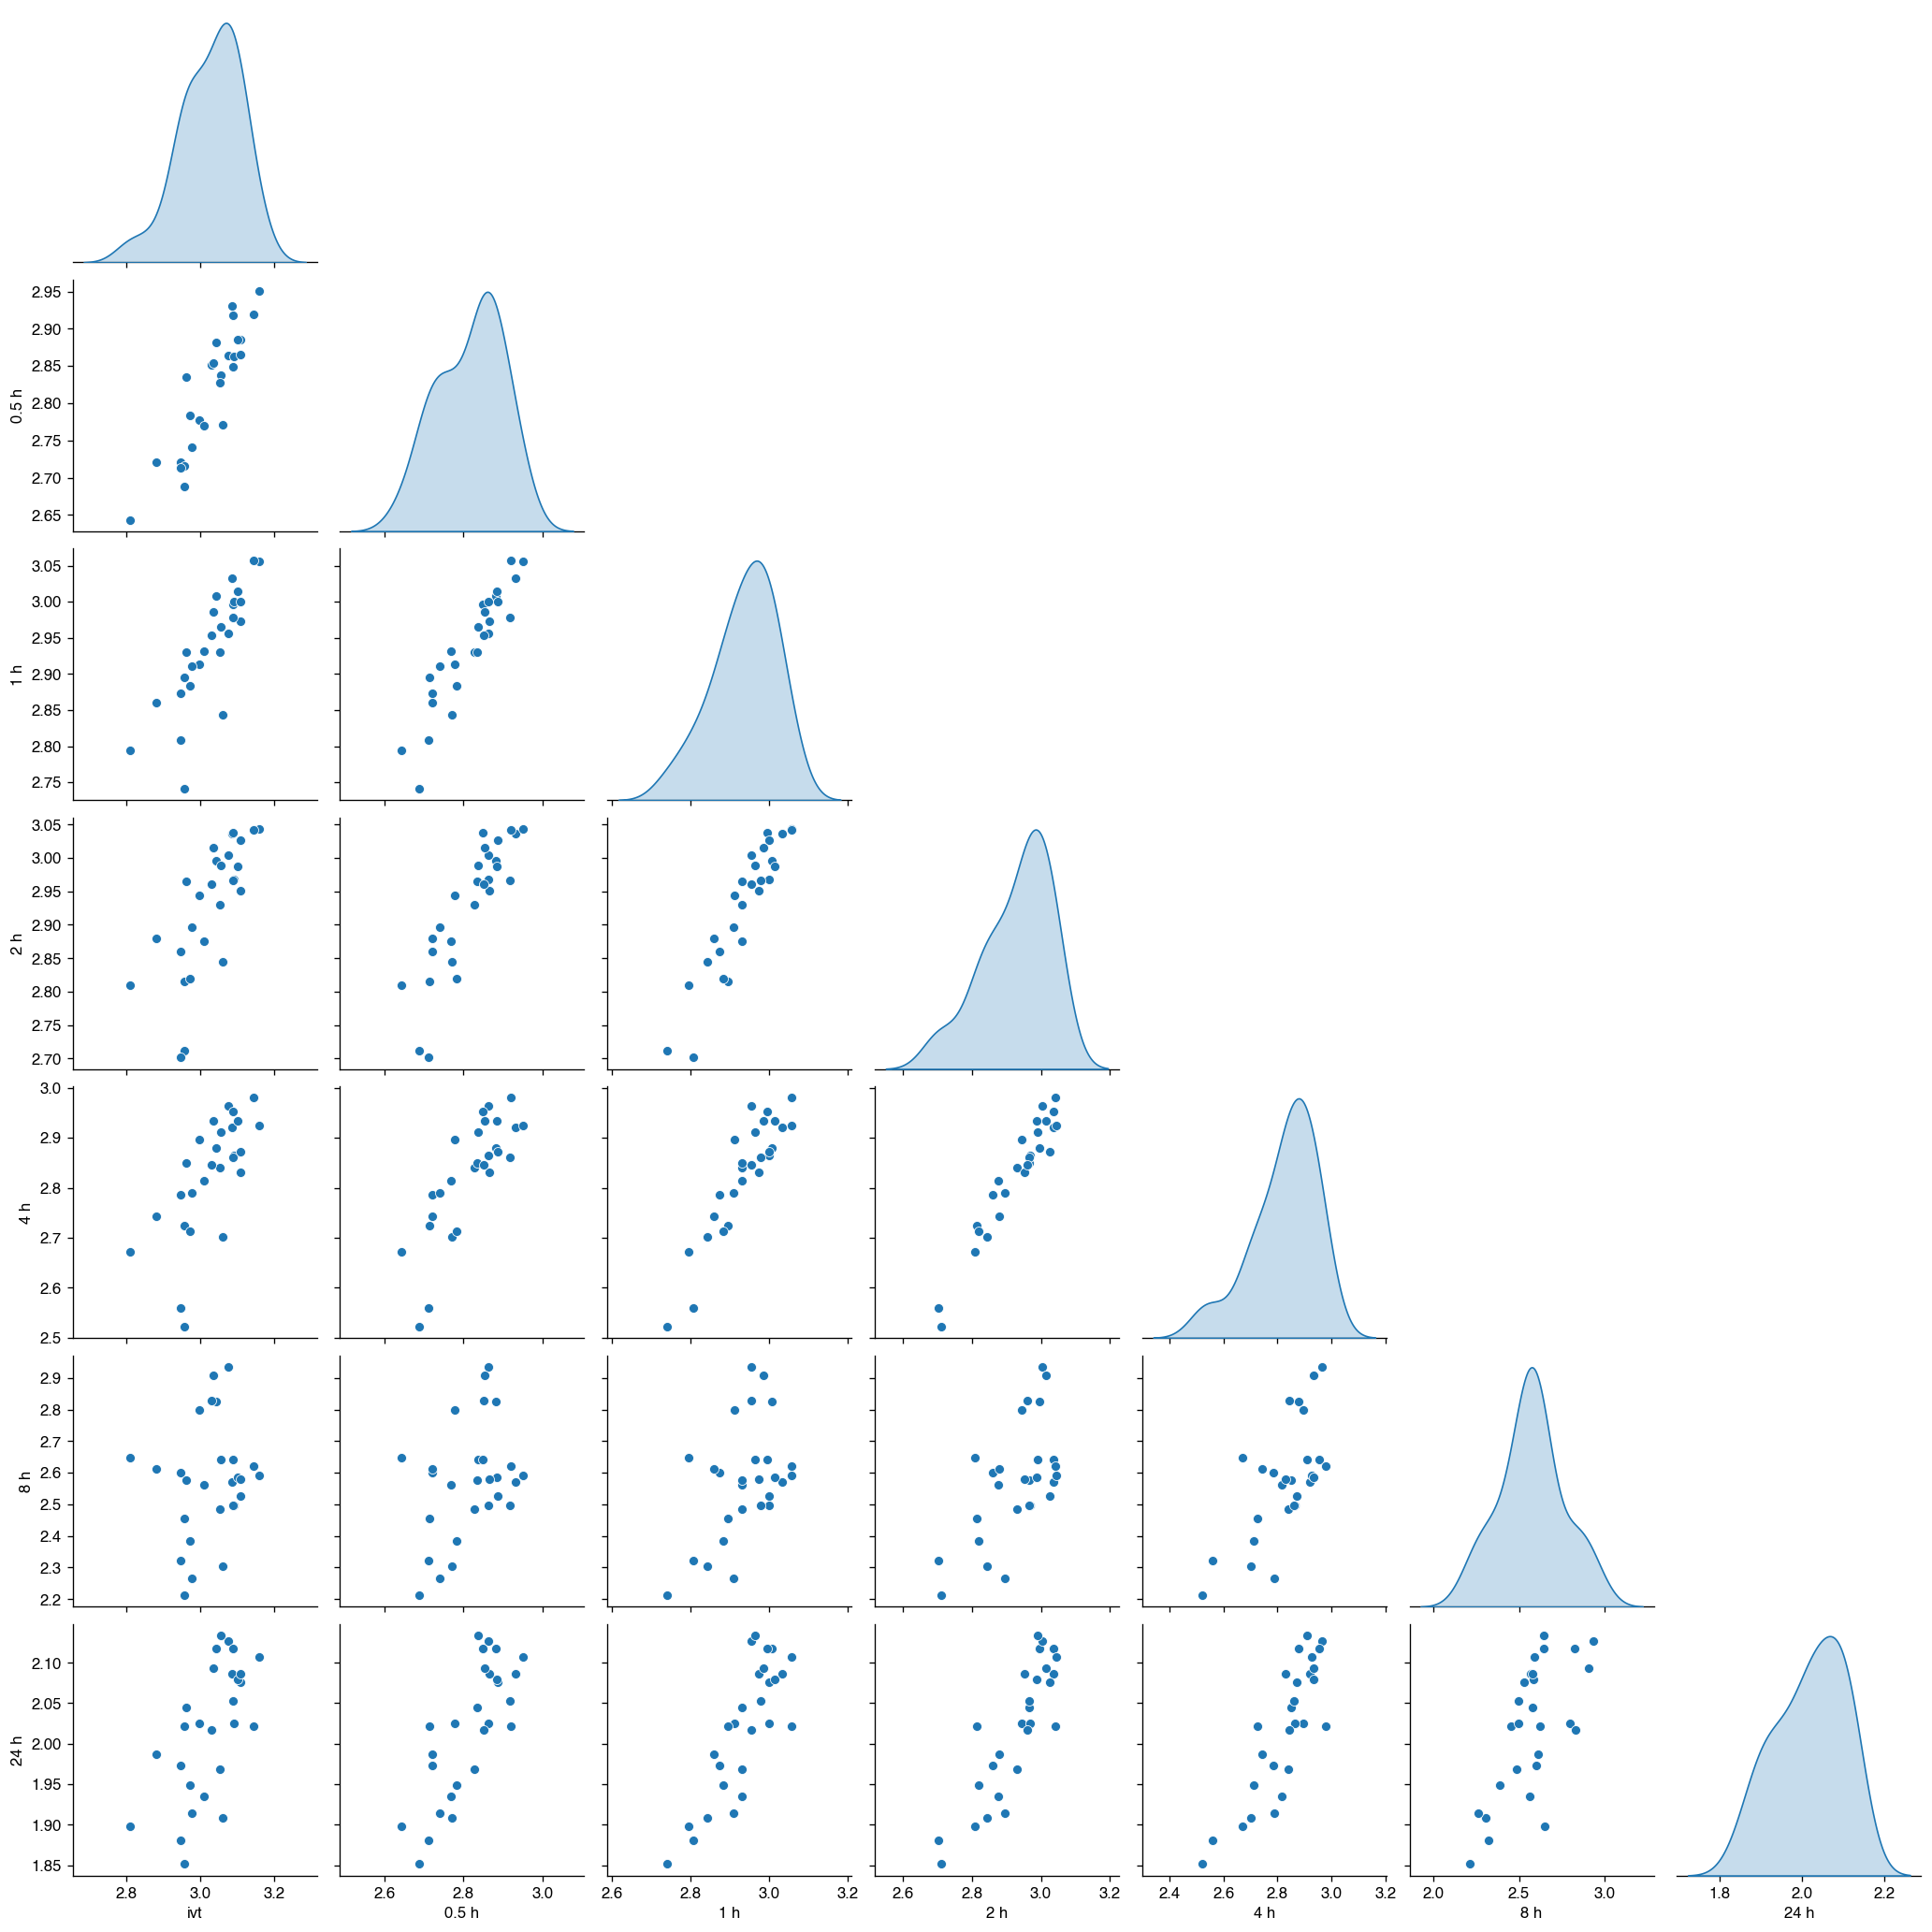

In [9]:
# all vs all scatter plots between all sequences across all stability libraries
seaborn.pairplot(
    numpy.log10(
        stab_df.loc[seq_ids, ['ivt'] + stab_libs].rename(columns={stab_libs[l]: f"{stab_time[l]} h" for l in range(len(stab_libs))})
    ),
    diag_kind='kde',
    corner=True,
)

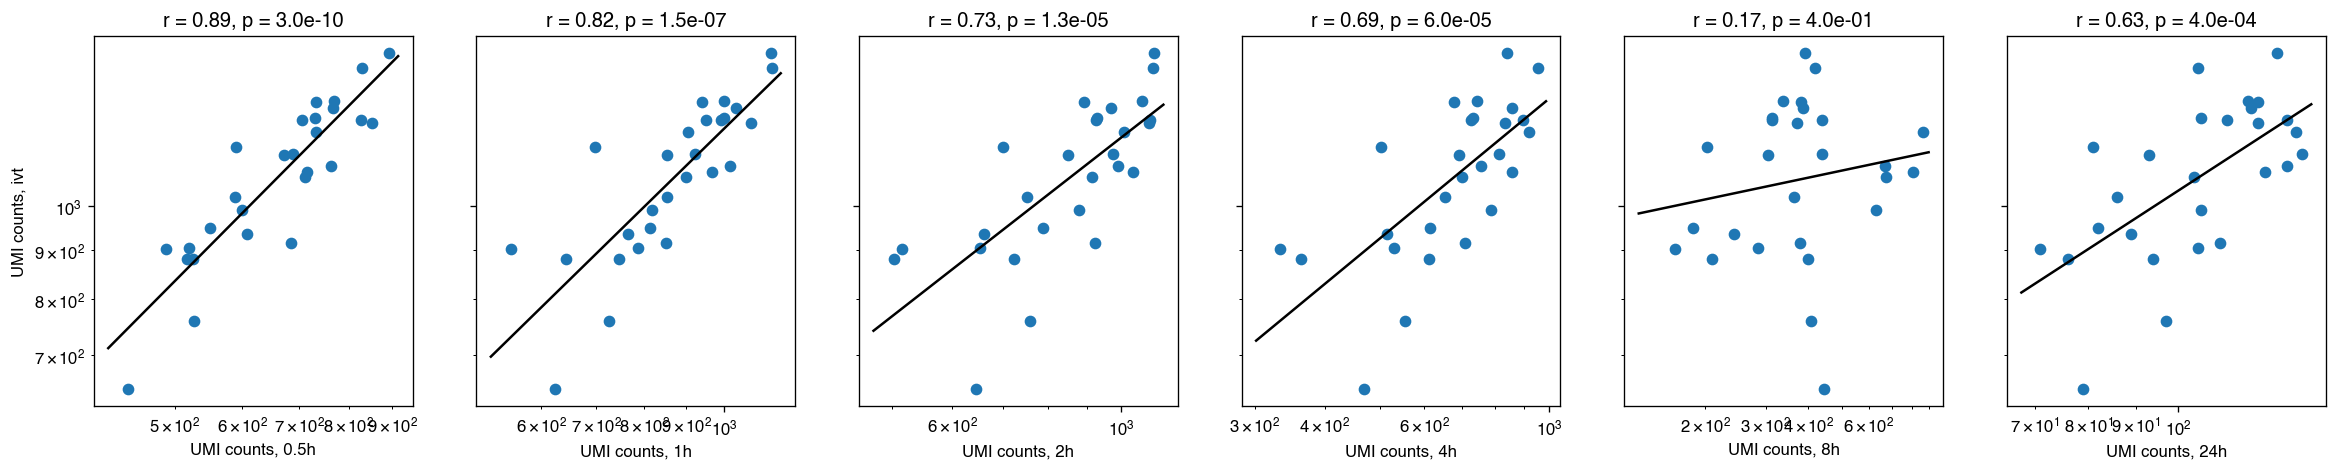

In [10]:
# Same as above but vs IVT
fig, axes = pyplot.subplots(1, len(stab_libs), figsize=(4*(len(stab_libs)), 4), sharey=True)

for axis_idx, stab_lib in enumerate(stab_libs):
    lib_idx = axis_idx
    ax = axes[axis_idx]
    ax.scatter(
        counts_df.loc[seq_ids, stab_lib],
        counts_df.loc[seq_ids, 'ivt'],
    )

    # linear regression
    lrres = scipy.stats.linregress(
        numpy.log10(counts_df.loc[seq_ids, stab_lib]),
        numpy.log10(counts_df.loc[seq_ids, 'ivt']),
    )
    xlim = ax.get_xlim()
    xvals = numpy.logspace(numpy.log10(xlim[0]), numpy.log10(xlim[1]), 100)
    ax.plot(xvals, 10**(lrres.intercept + lrres.slope * numpy.log10(xvals)), color='k')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(f'UMI counts, {stab_time[lib_idx]}h')
    if axis_idx == 0:
        ax.set_ylabel(f'UMI counts, ivt')
    ax.set_title(f"r = {lrres.rvalue:.2f}, p = {lrres.pvalue:.1e}")

## Calculate standard curves with the spike ins

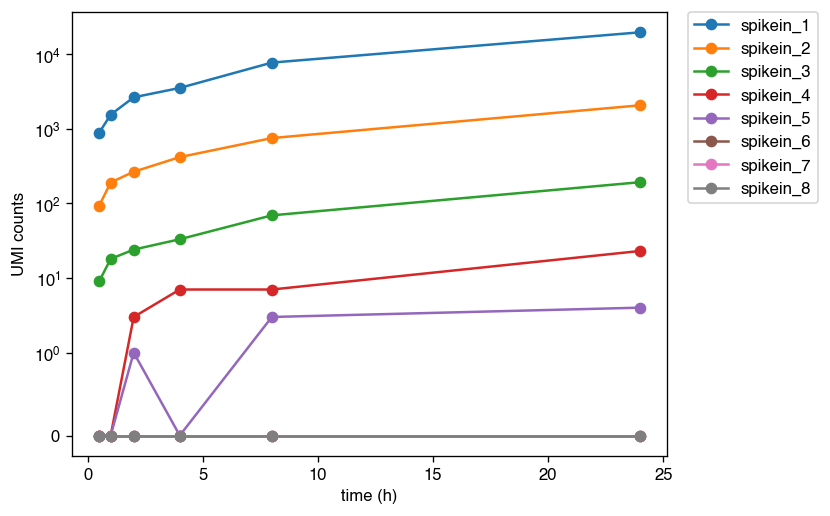

In [11]:
# Spike in plots
fig, ax = pyplot.subplots()
for spikein_id in spikein_ids:
    ax.plot(stab_time, stab_df.loc[spikein_id, stab_libs], 'o-', label=spikein_id)
ax.set_xlabel('time (h)')
ax.set_ylabel('UMI counts')
ax.set_yscale('symlog', linthresh=1)
ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

stab_1    stab_2    stab_3    stab_4    stab_5    stab_6
slope      1.005026  1.033416  0.980112  0.984070  0.977064  0.995668
intercept -2.965401 -3.315676 -3.360080 -3.520379 -3.800602 -4.281888

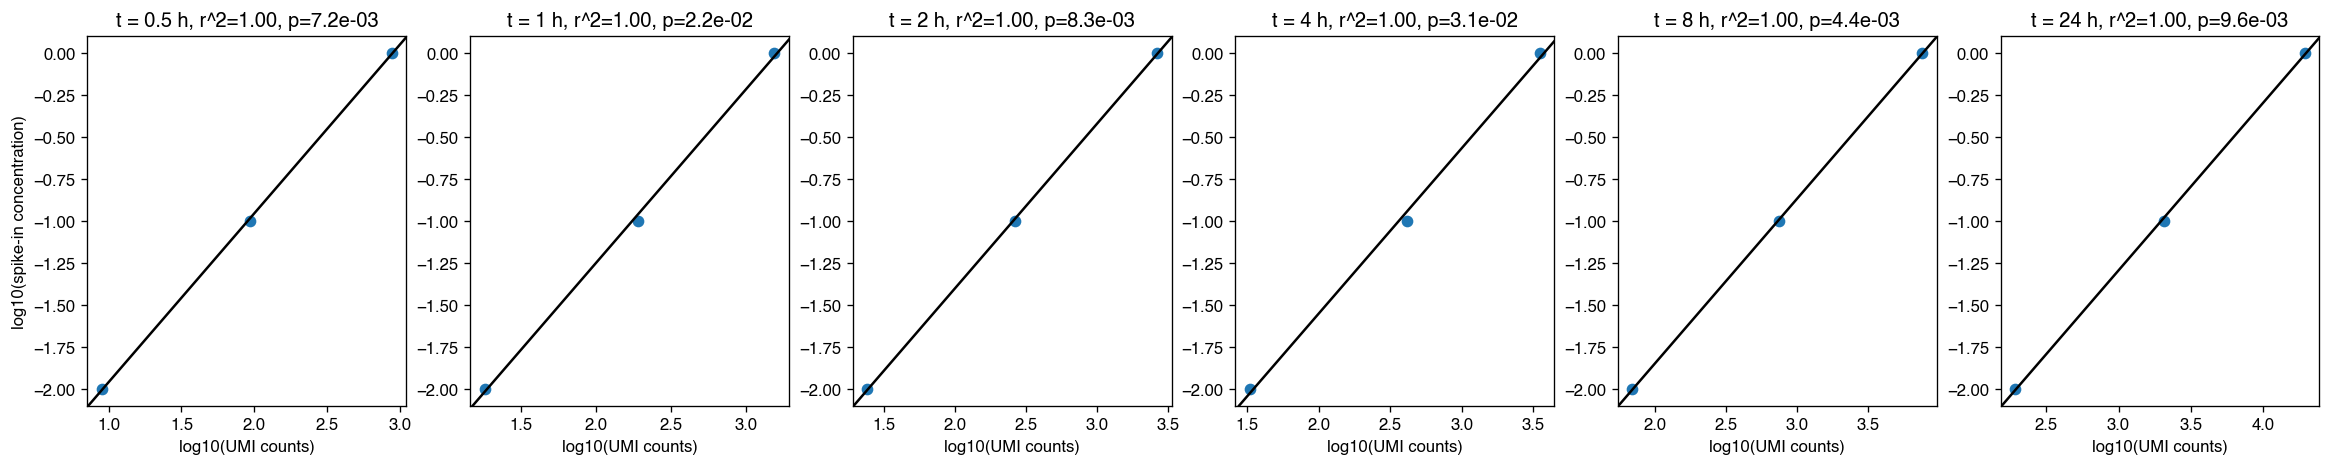

In [12]:
# Do linear regression on first three spikeins for every timepoint
spikeins_to_use = spikein_ids[:3]
spikeins_to_use_conc = spikein_concs[:3]

fig, axes = pyplot.subplots(1, len(stab_libs), figsize=(4*len(stab_libs), 4))

std_params = {}
for lib_idx, stab_lib in enumerate(stab_libs):
    spikein_df = stab_df.loc[spikeins_to_use, stab_lib]

    # Linear regression
    lrres = scipy.stats.linregress(numpy.log10(spikein_df.values), numpy.log10(spikeins_to_use_conc))

    # Plot
    ax = axes[lib_idx]
    ax.plot(numpy.log10(spikein_df.values), numpy.log10(spikeins_to_use_conc), 'o')
    xcoord = numpy.mean(ax.get_xlim())
    ax.axline((xcoord, lrres.intercept + lrres.slope * xcoord), slope=lrres.slope, color='k')
    ax.set_xlabel('log10(UMI counts)')
    if lib_idx == 0:
        ax.set_ylabel('log10(spike-in concentration)')
    ax.set_title(f"t = {stab_time[lib_idx]} h, r^2={lrres.rvalue**2:.2f}, p={lrres.pvalue:.1e}")

    # Save slope and intercept
    std_params[stab_lib] = (lrres.slope, lrres.intercept)

std_params_df = pandas.DataFrame(std_params, index=['slope', 'intercept'])
std_params_df


In [13]:
# Normalize to standard curve
stab_conc_df = 10**(std_params_df.loc['slope']*numpy.log10(stab_df.loc[seq_ids, stab_libs]) + std_params_df.loc['intercept'])
# Normalize to IVT
stab_conc_df = stab_conc_df / (stab_df.loc[seq_ids, 'ivt'].values.reshape(-1, 1) / stab_df.loc[seq_ids, 'ivt'].mean())
# Add info columns
stab_conc_df = pandas.concat([stab_conc_df, stab_df[info_cols]], axis=1)
stab_conc_df

stab_1    stab_2    stab_3    stab_4    stab_5    stab_6  \
seq_name                                                                
seq_1      0.838570  0.609647  0.370235  0.202001  0.089644  0.006587   
seq_2      0.743907  0.497496  0.348402  0.225810  0.106069  0.006223   
seq_3      0.731475  0.540285  0.366485  0.233172  0.093772  0.005927   
seq_4      0.719862  0.551920  0.340097  0.204221  0.067370  0.005909   
seq_5      0.736022  0.535860  0.355105  0.211019  0.057641  0.006650   
seq_6      0.847631  0.583724  0.366178  0.200531  0.045475  0.005538   
seq_7      0.696324  0.532176  0.364777  0.214260  0.053253  0.005906   
seq_8      0.693509  0.567725  0.299563  0.173037  0.047378  0.006430   
seq_13     0.696879  0.547614  0.304530  0.188345  0.053336  0.004672   
seq_14     0.620822  0.394598  0.252362  0.129343  0.026636  0.003908   
seq_15     0.717196  0.534988  0.310622  0.174747  0.038109  0.004764   
seq_16     0.653327  0.394160  0.237900  0.109770  0.027507  0.004365   
seq_17     0.720730  0.494630  0.311295  0.180334  0.040710  0.004567   
seq_18     0.750613  0.523127  0.315050  0.171379  0.040426  0.004918   
seq_19     0.785692  0.533622  0.293433  0.163130  0.039243  0.005279   
seq_20     0.708263  0.473898  0.238271  0.122479  0.036113  0.004787   
seq_28     0.701062  0.561346  0.343448  0.191025  0.029464  0.004794   
seq_29     0.904266  0.608908  0.415913  0.227324  0.061683  0.006714   
seq_30     0.725693  0.513208  0.340395  0.170284  0.039335  0.005133   
seq_31     0.735831  0.539544  0.316355  0.199416  0.045545  0.005262   
seq_32     0.692632  0.482171  0.287714  0.155424  0.044301  0.005270   
seq_33     0.817306  0.509462  0.310570  0.174045  0.038384  0.005098   
seq_34     0.723805  0.543797  0.325161  0.201106  0.044951  0.004186   
seq_35     0.838120  0.622713  0.413394  0.215513  0.080209  0.007085   
seq_36     0.822987  0.625528  0.414627  0.214930  0.102357  0.006785   
seq_37     0.802197  0.550654  0.351995  0.192083  0.092876  0.005376   
seq_38     0.797073  0.586636  0.392797  0.231865  0.109656  0.006329   
spikein_1       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_2       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_3       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_4       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_5       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_6       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_7       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_8       NaN       NaN       NaN       NaN       NaN       NaN   

             N50 MRL  Optimus MRL             Description  \
seq_name                                                    
seq_1       2.142014     1.869994  N50, MPRA, varying MRL   
seq_2       3.497435     3.500646  N50, MPRA, varying MRL   
seq_3       5.000827     5.002466  N50, MPRA, varying MRL   
seq_4       6.495498     6.496485  N50, MPRA, varying MRL   
seq_5      10.360462     7.823140     N50, MPRA, high MRL   
seq_6       9.309283     7.739455     N50, MPRA, high MRL   
seq_7       9.225635     7.644577     N50, MPRA, high MRL   
seq_8       8.996744     7.939284     N50, MPRA, high MRL   
seq_13           NaN     8.296752            N50, SeqProp   
seq_14           NaN     8.129437            N50, SeqProp   
seq_15           NaN     7.935947            N50, SeqProp   
seq_16           NaN     7.910669            N50, SeqProp   
seq_17           NaN     7.858076        N50, SeqProp+VAE   
seq_18           NaN     7.977843        N50, SeqProp+VAE   
seq_19           NaN     7.849075        N50, SeqProp+VAE   
seq_20           NaN     7.926457        N50, SeqProp+VAE   
seq_28           NaN     9.757784                N50, DEN   
seq_29           NaN     9.343899                N50, DEN   
seq_30           NaN     9.214127                N50, DEN   
seq_31           NaN     9.167

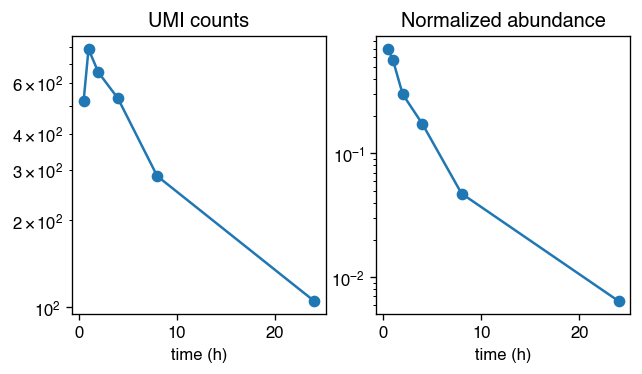

In [14]:
# One sequence
seq_id = 'seq_8'
fig, axes = pyplot.subplots(1, 2, figsize=(6, 3))

ax = axes[0]
ax.plot(stab_time, stab_df.loc[seq_id, stab_libs], 'o-', label=seq_id)
ax.set_xlabel('time (h)')
ax.set_title('UMI counts')
ax.set_yscale('log')

ax = axes[1]
ax.plot(stab_time, stab_conc_df.loc[seq_id, stab_libs], 'o-', label=seq_id)
ax.set_xlabel('time (h)')
# ax.set_title('Concentration (fg/uL)')
ax.set_title('Normalized abundance')
ax.set_yscale('log')


# ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')


Text(0.5, 0, 'Normalized abundance')

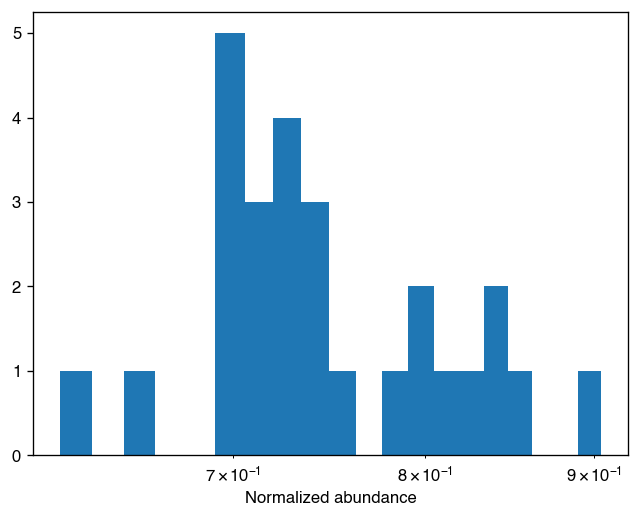

In [15]:
# Histogram at 30 min
fig, ax = pyplot.subplots()
ax.hist(stab_conc_df.loc[:, 'stab_1'], bins=20)
ax.set_xscale('log')
# ax.set_xlabel('Concentration, fg/uL')
ax.set_xlabel('Normalized abundance')

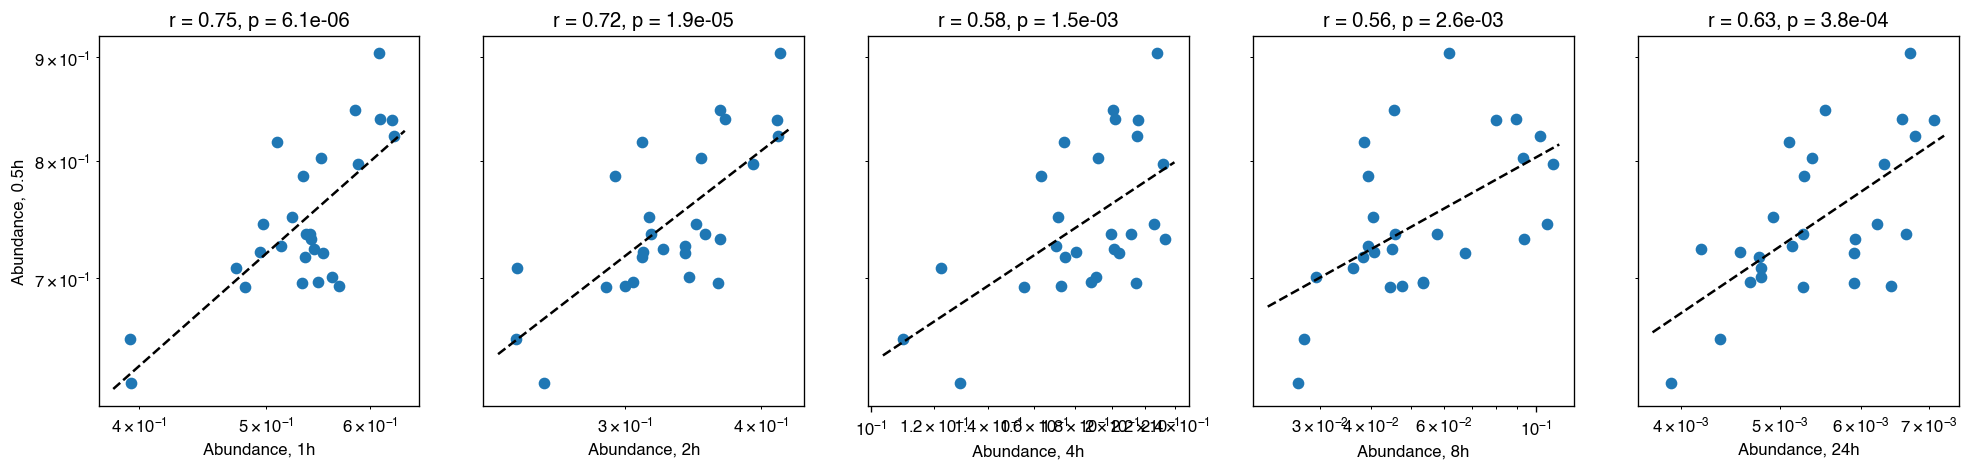

In [16]:
# All timepoints vs 30 min
fig, axes = pyplot.subplots(1, len(stab_libs) - 1, figsize=(4*(len(stab_libs) - 1), 4), sharey=True)

for axis_idx, stab_lib in enumerate(stab_libs[1:]):
    lib_idx = axis_idx + 1
    ax = axes[axis_idx]
    ax.scatter(
        stab_conc_df.loc[seq_ids, stab_lib],
        stab_conc_df.loc[seq_ids, stab_libs[0]],
    )

    # linear regression
    lrres = scipy.stats.linregress(
        numpy.log10(stab_conc_df.loc[seq_ids, stab_lib]),
        numpy.log10(stab_conc_df.loc[seq_ids, stab_libs[0]]),
    )
    xlim = ax.get_xlim()
    xvals = numpy.logspace(numpy.log10(xlim[0]), numpy.log10(xlim[1]), 100)
    ax.plot(xvals, 10**(lrres.intercept + lrres.slope * numpy.log10(xvals)), color='k', linestyle='--')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(f'Abundance, {stab_time[lib_idx]}h')
    if axis_idx == 0:
        ax.set_ylabel(f'Abundance, {stab_time[0]}h')
    ax.set_title(f"r = {lrres.rvalue:.2f}, p = {lrres.pvalue:.1e}")

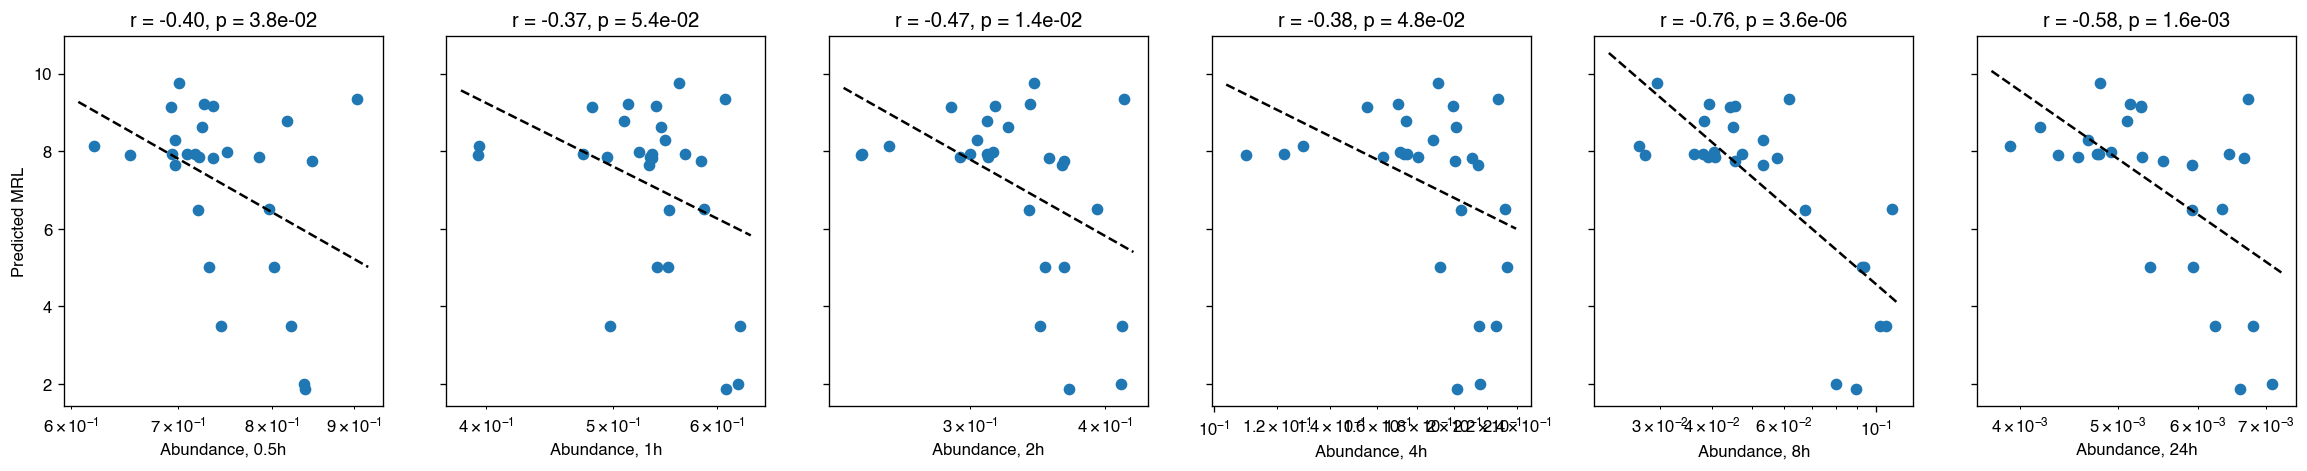

In [17]:
# All timepoints vs predicted MRL
fig, axes = pyplot.subplots(1, len(stab_libs), figsize=(4*len(stab_libs), 4), sharey=True)

for lib_idx, stab_lib in enumerate(stab_libs):
    ax = axes[lib_idx]
    ax.scatter(
        stab_conc_df.loc[seq_ids, stab_lib],
        stab_conc_df.loc[seq_ids, 'Optimus MRL'],
    )

    # linear regression
    lrres = scipy.stats.linregress(
        numpy.log10(stab_conc_df.loc[seq_ids, stab_lib]),
        stab_conc_df.loc[seq_ids, 'Optimus MRL'],
    )
    xlim = ax.get_xlim()
    xvals = numpy.logspace(numpy.log10(xlim[0]), numpy.log10(xlim[1]), 100)
    ax.plot(xvals, lrres.intercept + lrres.slope * numpy.log10(xvals), color='k', linestyle='--')

    ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlabel(f'Abundance, {stab_time[lib_idx]}h')
    if lib_idx == 0:
        ax.set_ylabel(f'Predicted MRL')
    ax.set_title(f"r = {lrres.rvalue:.2f}, p = {lrres.pvalue:.1e}")

## Analyze based on first order kinetics

C:\Users\casti\AppData\Local\Temp\ipykernel_32324\3751371361.py:6: RuntimeWarning: invalid value encountered in log10
  return numpy.log10(y) - numpy.log10(exp_decay(t, *params))


t_1/2    N50 MRL  Optimus MRL             Description  \
seq_1      3.548335   2.142014     1.869994  N50, MPRA, varying MRL   
seq_2      3.598955   3.497435     3.500646  N50, MPRA, varying MRL   
seq_3      3.521662   5.000827     5.002466  N50, MPRA, varying MRL   
seq_4      3.527959   6.495498     6.496485  N50, MPRA, varying MRL   
seq_5      3.600361  10.360462     7.823140     N50, MPRA, high MRL   
seq_6      3.386857   9.309283     7.739455     N50, MPRA, high MRL   
seq_7      3.510988   9.225635     7.644577     N50, MPRA, high MRL   
seq_8      3.622202   8.996744     7.939284     N50, MPRA, high MRL   
seq_13     3.379376        NaN     8.296752            N50, SeqProp   
seq_14     3.390508        NaN     8.129437            N50, SeqProp   
seq_15     3.376175        NaN     7.935947            N50, SeqProp   
seq_16     3.491037        NaN     7.910669            N50, SeqProp   
seq_17     3.362952        NaN     7.858076        N50, SeqProp+VAE   
seq_18     3.395653        NaN     7.977843        N50, SeqProp+VAE   
seq_19     3.448465        NaN     7.849075        N50, SeqProp+VAE   
seq_20     3.499182        NaN     7.926457        N50, SeqProp+VAE   
seq_28     3.332587        NaN     9.757784                N50, DEN   
seq_29     3.482181        NaN     9.343899                N50, DEN   
seq_30     3.424095        NaN     9.214127                N50, DEN   
seq_31     3.432714        NaN     9.167394                N50, DEN   
seq_32     3.522363        NaN     9.146587                N50, DEN   
seq_33     3.404243        NaN     8.777226            N50, DEN+VAE   
seq_34     3.267580        NaN     8.636530            N50, DEN+VAE   
seq_35     3.562992        NaN     1.994527   N50, DEN, varying MRL   
seq_36     3.548105        NaN     3.499113   N50, DEN, varying MRL   
seq_37     3.447694        NaN     5.011988   N50, DEN, varying MRL   
seq_38     3.525142        NaN     6.500868   N50, DEN, varying MRL   
spikein_1       NaN        NaN          NaN                     NaN   
spikein_2       NaN        NaN          NaN                     NaN   
spikein_3       NaN        NaN          NaN                     NaN   
spikein_4       NaN        NaN          NaN                     NaN   
spikein_5       NaN        NaN          NaN                     NaN   
spikein_6       NaN        NaN          NaN                     NaN   
spikein_7       NaN        NaN          NaN                     NaN   
spikein_8       NaN        NaN          NaN                     NaN   

           Mean normalized indel %, K562, PDCD1  \
seq_1                                  0.441614   
seq_2                                  0.744349   
seq_3                                  0.958460   
seq_4                                  1.036177   
seq_5                                  0.993462   
seq_6                                  1.016965   
seq_7                                  0.977448   
seq_8                                  0.997069   
seq_13                                 0.987451   
seq_14                                 0.812512   
seq_15                                 0.924623   
seq_16                                 0.715745   
seq_17                                 0.958586   
seq_18                                 0.989540   
seq_19                                 0.905694   
seq_20                                 0.735640   
seq_28                                 1.007013   
seq_29                                 1.046220   
seq_30                                 0.930605   
seq_31                                 0.993189   
seq_32                                 0.953109   
seq_33                                 0.936653   
seq_34                                 1.064507   
seq_35                                 0.221609   
seq_36                                 0.720678   
seq_37                                 0.803112   
seq_38                                 0.838221   
spikein_1                    

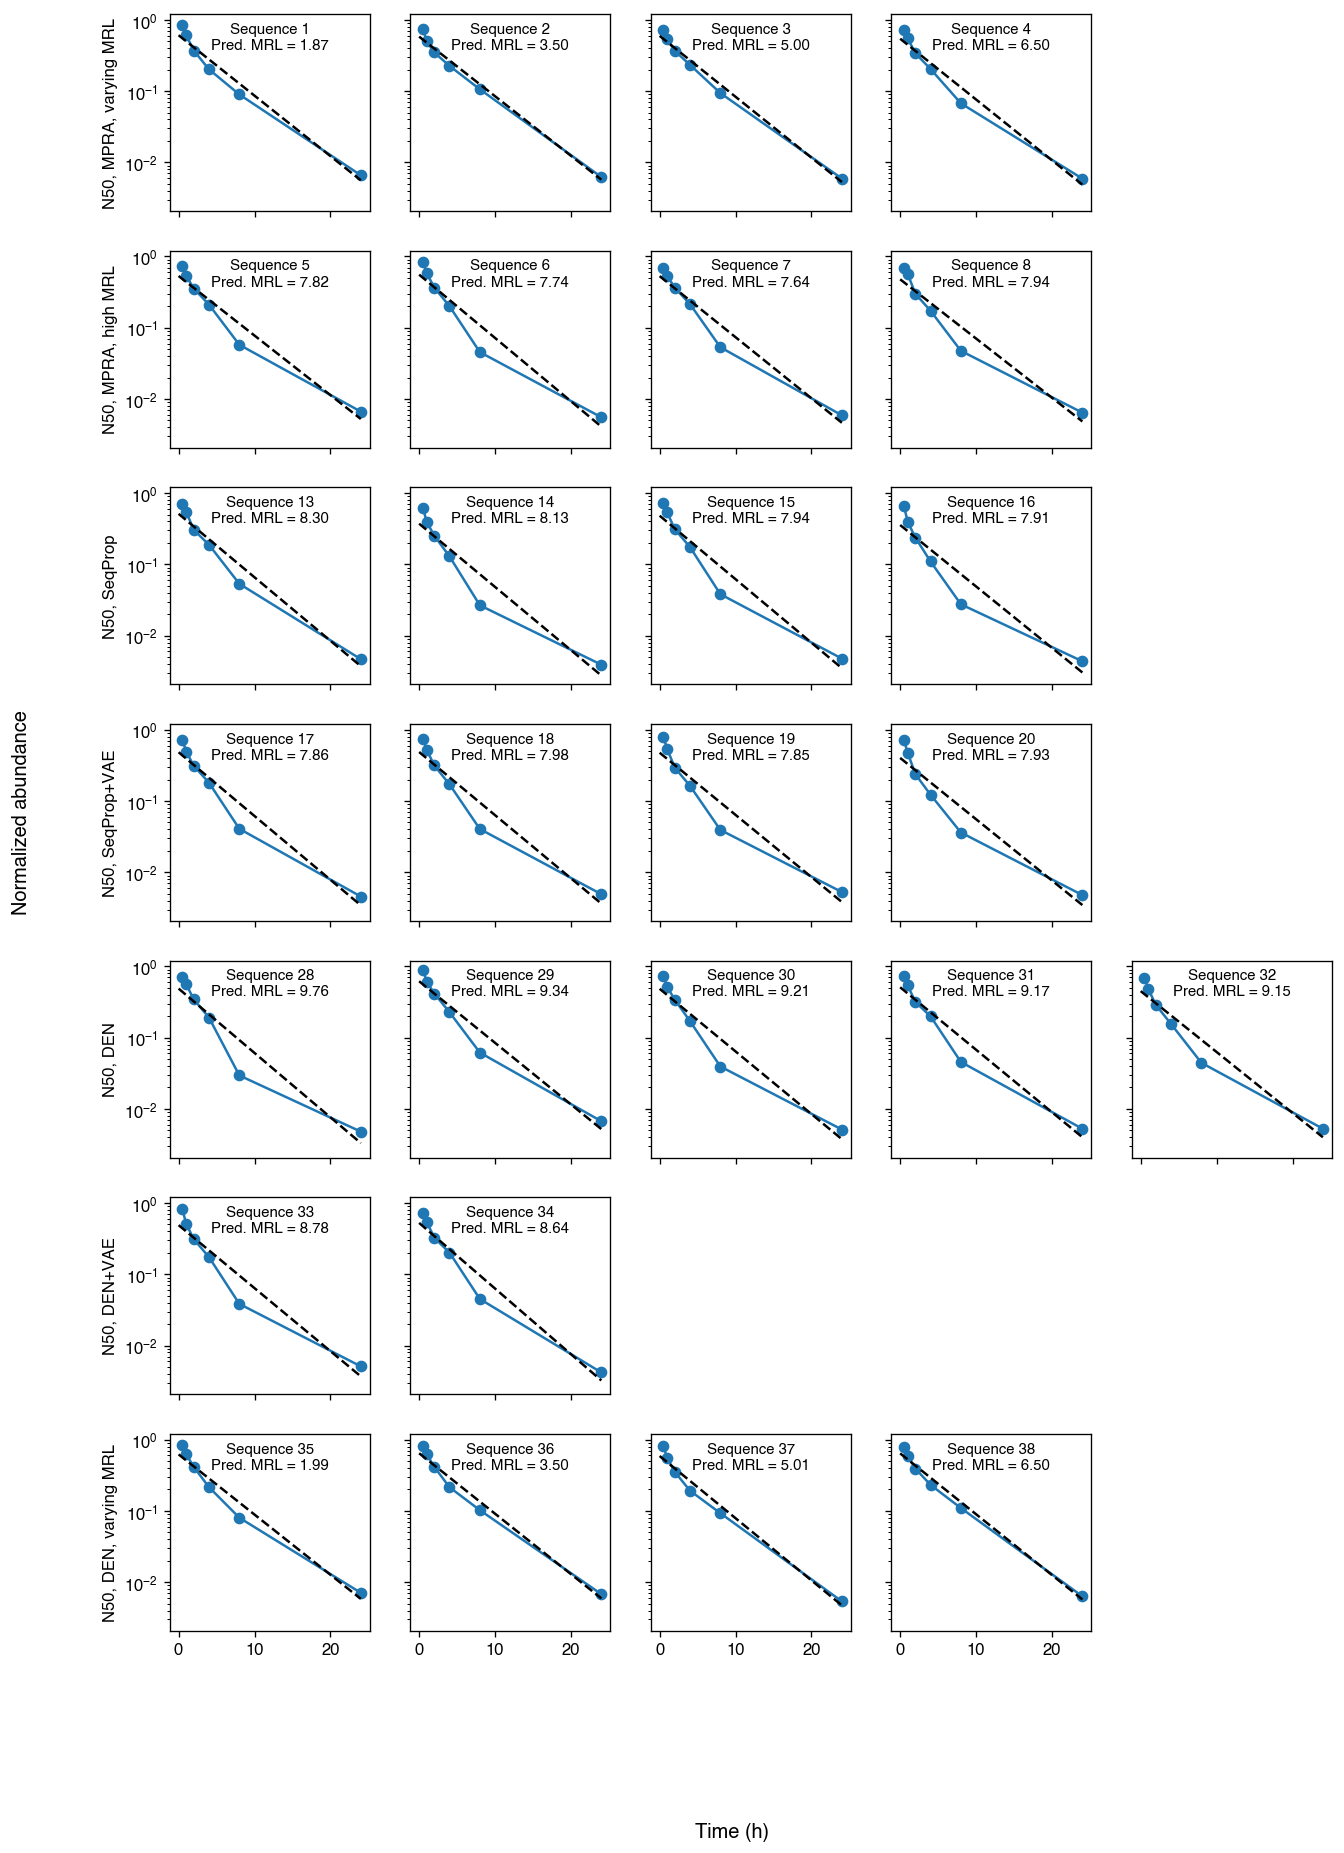

In [18]:
# Fit each sequence's timecourse to an exponential decay
def exp_decay(t, a, b):
    return a * numpy.exp(-b * t)

def exp_decay_residual(params, t, y):
    return numpy.log10(y) - numpy.log10(exp_decay(t, *params))

def fit_exp_decay(t, y):
    params, _ = scipy.optimize.leastsq(exp_decay_residual, [1, 1], args=(t, y))
    return params

design_descriptions = stab_conc_df['Description'].dropna().unique()
nrows = len(design_descriptions)
ncols = stab_conc_df['Description'].value_counts().max()
fig, axes = pyplot.subplots(nrows, ncols, figsize=(2.5*ncols, 2.5*nrows), sharey=True, sharex=True)
for ax in axes.ravel():
    ax.axis("off")

stab_t2 = {}

for description_idx, description in enumerate(design_descriptions):
    description_df = stab_conc_df[stab_conc_df['Description'] == description]
    for seq_idx, seq_id in enumerate(description_df.index):
        t = numpy.array(stab_time)
        y = description_df.loc[seq_id, stab_libs].astype(float).values
        params = fit_exp_decay(t, y)

        ax = axes[description_idx, seq_idx]
        ax.axis("on")
        ax.plot(t, y, 'o-', label=seq_id)

        t_cont_plot = numpy.linspace(0, 24, 100)
        ax.plot(t_cont_plot, exp_decay(t_cont_plot, *params), '--', color='k')

        ax.set_yscale('log')
        ax.set_title(
            "Sequence {}\nPred. MRL = {:.2f}".format(
                seq_id.split('_')[1],
                stab_conc_df.loc[seq_id, 'Optimus MRL'],
            ),
            y=0.77,
            fontsize=9,
        )
        if seq_idx == 0:
            ax.set_ylabel(description)

        stab_t2[seq_id] = numpy.log(2)/params[1]

fig.supxlabel('Time (h)')
fig.supylabel('Normalized abundance')
fig.savefig('stability_timecourse_with_exp_logscale.pdf', bbox_inches='tight')
# fig.savefig('stability_timecourse_with_exp_logscale.png', bbox_inches='tight')

stab_t2_df = pandas.DataFrame(stab_t2, index=['t_1/2']).T
stab_t2_df = pandas.concat([stab_t2_df, stab_conc_df[info_cols]], axis=1)
stab_t2_df

C:\Users\casti\AppData\Local\Temp\ipykernel_32324\3751371361.py:6: RuntimeWarning: invalid value encountered in log10
  return numpy.log10(y) - numpy.log10(exp_decay(t, *params))


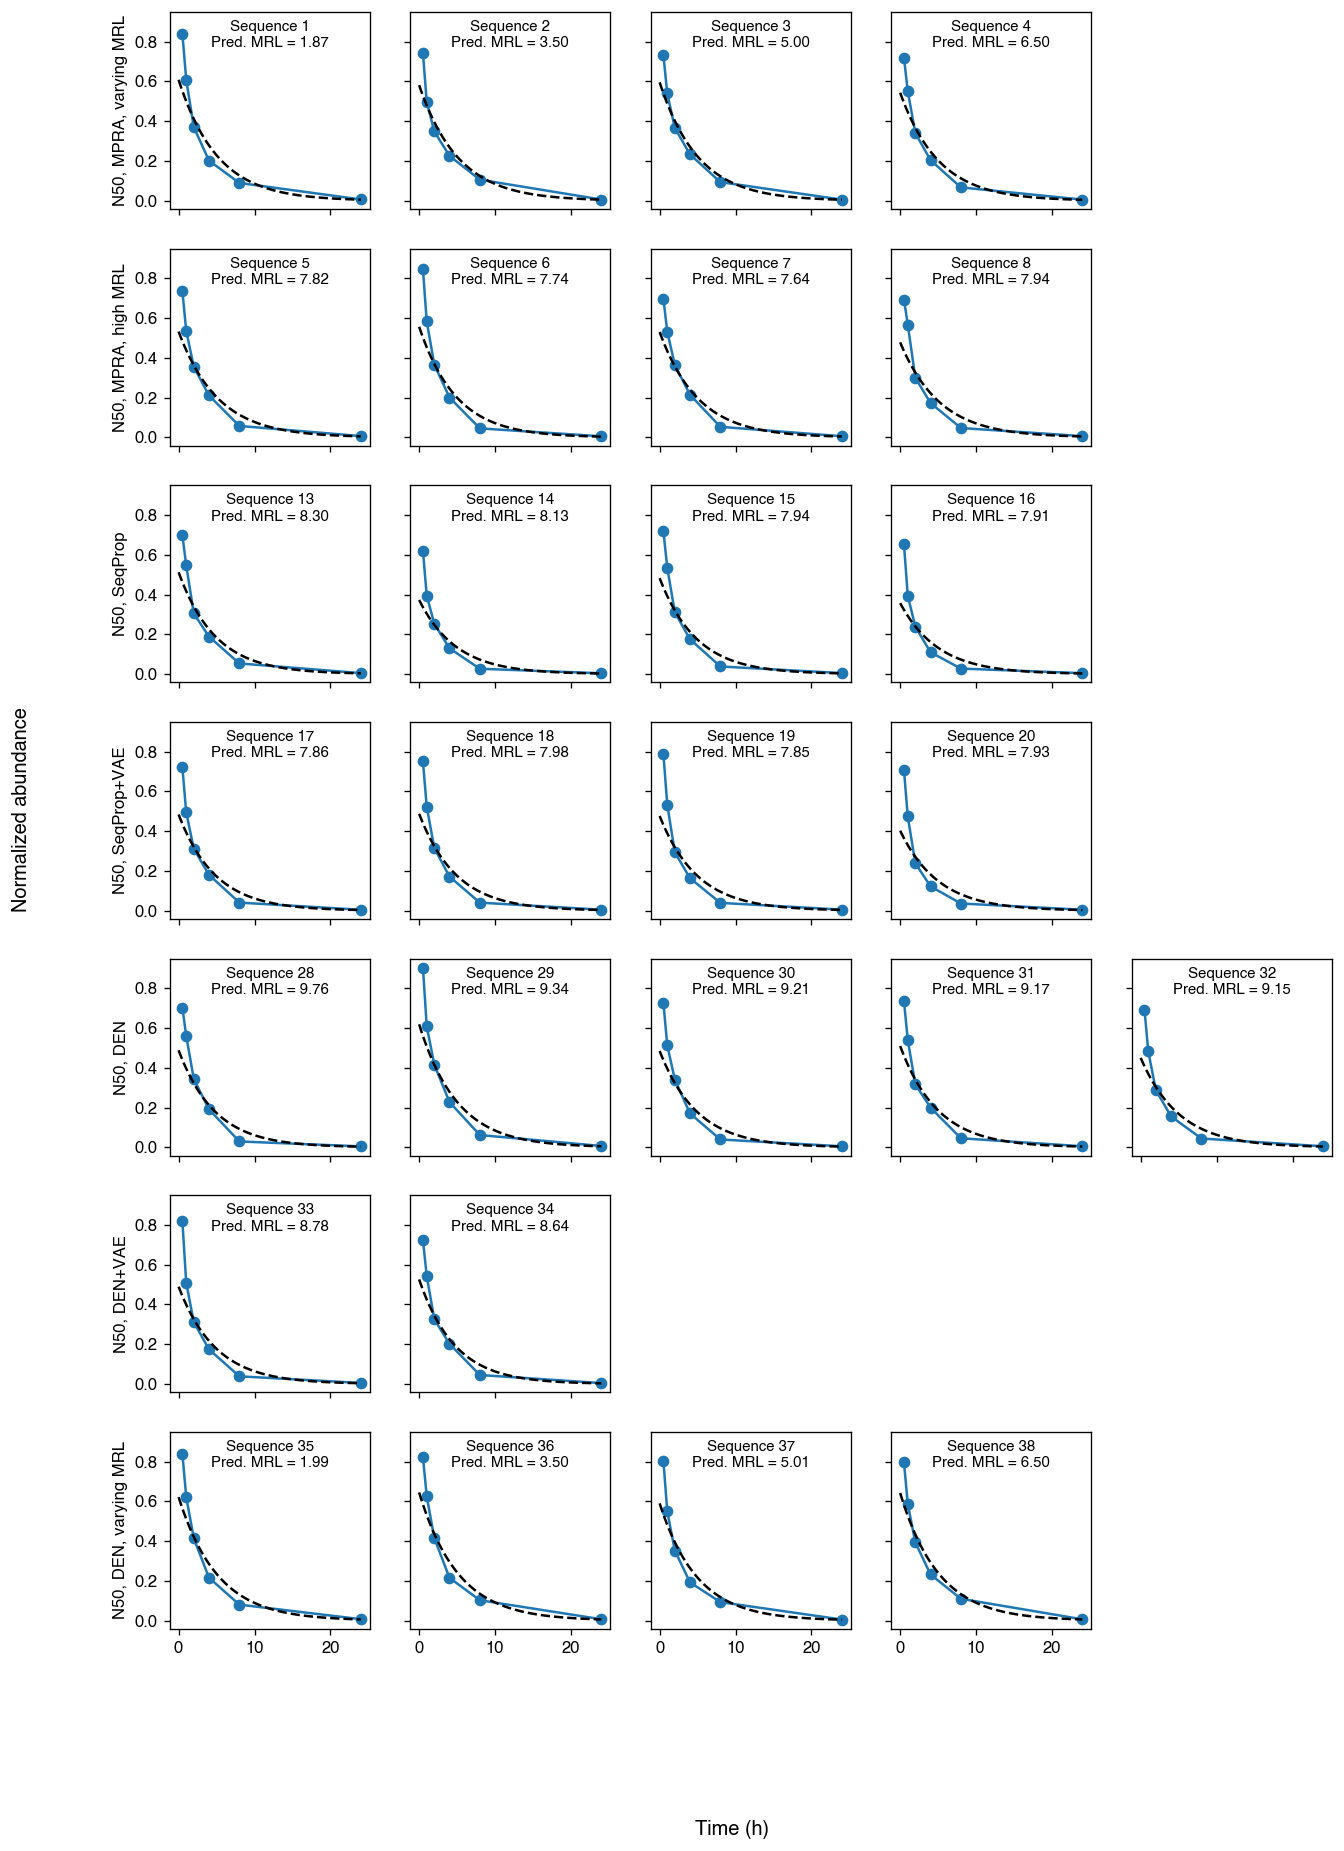

In [19]:
# Repeat plot in linear scale
fig, axes = pyplot.subplots(nrows, ncols, figsize=(2.5*ncols, 2.5*nrows), sharey=True, sharex=True)
for ax in axes.ravel():
    ax.axis("off")

for description_idx, description in enumerate(design_descriptions):
    description_df = stab_conc_df[stab_conc_df['Description'] == description]
    for seq_idx, seq_id in enumerate(description_df.index):
        t = numpy.array(stab_time)
        y = description_df.loc[seq_id, stab_libs].astype(float).values
        params = fit_exp_decay(t, y)

        ax = axes[description_idx, seq_idx]
        ax.axis("on")
        ax.plot(t, y, 'o-', label=seq_id)

        t_cont_plot = numpy.linspace(0, 24, 100)
        ax.plot(t_cont_plot, exp_decay(t_cont_plot, *params), '--', color='k')

        # ax.set_yscale('log')
        ax.set_title(
            "Sequence {}\nPred. MRL = {:.2f}".format(
                seq_id.split('_')[1],
                stab_conc_df.loc[seq_id, 'Optimus MRL'],
            ),
            y=0.77,
            fontsize=9,
        )
        if seq_idx == 0:
            ax.set_ylabel(description)

        # stab_t2[seq_id] = numpy.log(2)/params[1]

fig.supxlabel('Time (h)')
fig.supylabel('Normalized abundance')
fig.savefig('stability_timecourse_with_exp_linscale.pdf', bbox_inches='tight')

In [20]:
def plot_vs_predicted_mrl(
        df,
        col_x,
        seq_ids_to_plot=seq_ids,
        xlabel=None,
        ax=None,
        linreg=True,
        linreg_seq_ids=None,
        pred_mrl_col='Optimus MRL',
        pred_mrl_label='Predicted MRL',
    ):
    
    seq_ids_no_var = df.index[~df['Description'].isin(['N50, MPRA, varying MRL', 'N50, DEN, varying MRL'])]
    seq_ids_no_var = [s for s in seq_ids_no_var if s in seq_ids]

    if ax is None:
        fig, ax = pyplot.subplots(figsize=(3.3, 3.3))
    ax.scatter(
        df.loc[seq_ids_to_plot, col_x],
        df.loc[seq_ids_to_plot, pred_mrl_col],
        c=[seq_colors_dict[d] for d in df.loc[seq_ids_to_plot, 'Description']],
    )
    
    # linear regression
    if linreg:
        if linreg_seq_ids is None:
            linreg_seq_ids = seq_ids_to_plot
            linestyle = '-'
        else:
            linestyle = '--'
        lrres = scipy.stats.linregress(
            df.loc[linreg_seq_ids, col_x],
            df.loc[linreg_seq_ids, pred_mrl_col],
        )
        xmean = numpy.mean(ax.get_xlim())
        ax.axline((xmean, lrres.intercept + xmean*lrres.slope), slope=lrres.slope, color='k', linewidth=2, linestyle=linestyle, zorder=-1)
    
    for design in df.loc[seq_ids, 'Description'].unique():
        ax.plot([], [], 'o', color=seq_colors_dict[design], label=design)
    ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
    
    if linreg:
        ax.set_title(f"$r^2$ = {lrres.rvalue**2:.2f}, $p$ = {lrres.pvalue:.1e}")
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    ax.set_ylabel(pred_mrl_label)

    return fig, ax

In [21]:
def plot_vs_editing(
        df,
        col_x,
        seq_ids_to_plot=seq_ids,
        xlabel=None,
        axsize=(4, 4),
        fig=None,
        linreg=True,
        linreg_seq_ids=None,
        ylim_upper_scale=None,
    ):
    if fig is None:
        fig, axes = pyplot.subplots(
            len(megatal_celltype_vals),
            len(megatal_target_vals),
            figsize=(len(megatal_target_vals)*axsize[0], len(megatal_celltype_vals)*axsize[1]),
            sharex=True,
            squeeze=False,
        )
    else:
        axes = fig.axes

    for celltype_idx, celltype in enumerate(megatal_celltype_vals):
        for target_idx, target in enumerate(megatal_target_vals):
            ax = axes[celltype_idx, target_idx]
            
            for seq_id in seq_ids_to_plot:
                ax.errorbar(
                    df.loc[seq_id, col_x],
                    stab_conc_df.loc[seq_id, f'Mean normalized indel %, {celltype}, {target}'],
                    yerr=stab_conc_df.loc[seq_id, f'Std normalized indel %, {celltype}, {target}'],
                    color=seq_colors_dict[stab_conc_df.loc[seq_id, 'Description']],
                    marker='o',
                    linestyle='',
                )

            if linreg:
                if linreg_seq_ids is None:
                    linreg_seq_ids = seq_ids_to_plot
                if linreg_seq_ids==seq_ids_to_plot:
                    linestyle = '-'
                else:
                    linestyle = '--'
                lrres = scipy.stats.linregress(
                    df.loc[linreg_seq_ids, col_x],
                    stab_conc_df.loc[linreg_seq_ids, f'Mean normalized indel %, {celltype}, {target}'],
                )
                xmean = numpy.mean(ax.get_xlim())
                ax.axline((xmean, lrres.intercept + xmean*lrres.slope), slope=lrres.slope, color='k', linewidth=2, linestyle=linestyle, zorder=-1)

            if linreg:
                ax.set_title(f"{celltype}, {target}\n$r^2$={lrres.rvalue**2:.2f}, $p$={lrres.pvalue:.1e}")
            else:
                ax.set_title(f"{celltype}, {target}")
            
            if (celltype_idx == 0) and (target_idx == len(megatal_target_vals) - 1):
                for design in stab_conc_df.loc[seq_ids_to_plot, 'Description'].unique():
                    ax.plot([], [], 'o', color=seq_colors_dict[design], label=design)
                ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

            # if celltype_idx == len(megatal_celltype_vals) - 1:
            #     ax.set_xlabel(xlabel)
            # if target_idx == 0:
            #     ax.set_ylabel('Mean normalized indel %')

            if ylim_upper_scale is not None:
                ax.set_ylim(top=ax.get_ylim()[1] + (ax.get_ylim()[1] - ax.get_ylim()[0])*(ylim_upper_scale - 1))
    
    fig.supxlabel(xlabel)
    fig.supylabel('Editing %\n(normalized to Strong Kozak)', ha='center')

    return fig

In [22]:
seq_ids_no_var = stab_conc_df.index[~stab_conc_df['Description'].isin(['N50, MPRA, varying MRL', 'N50, DEN, varying MRL'])]
seq_ids_no_var = [s for s in seq_ids_no_var if s in seq_ids]

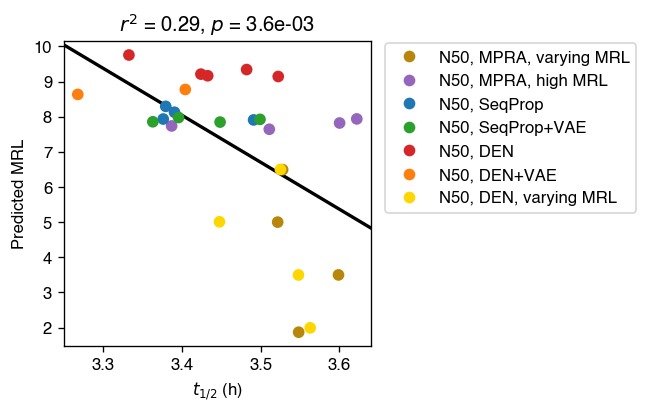

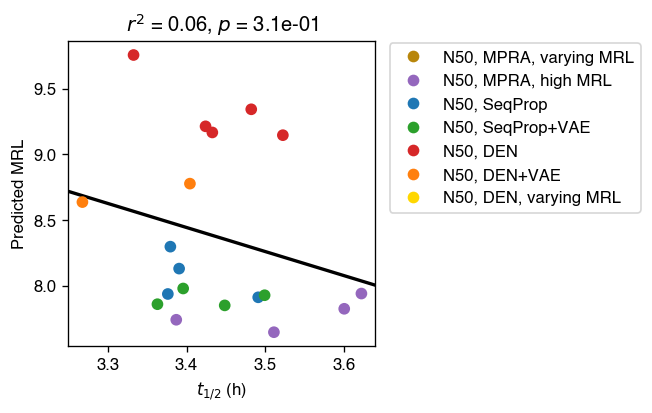

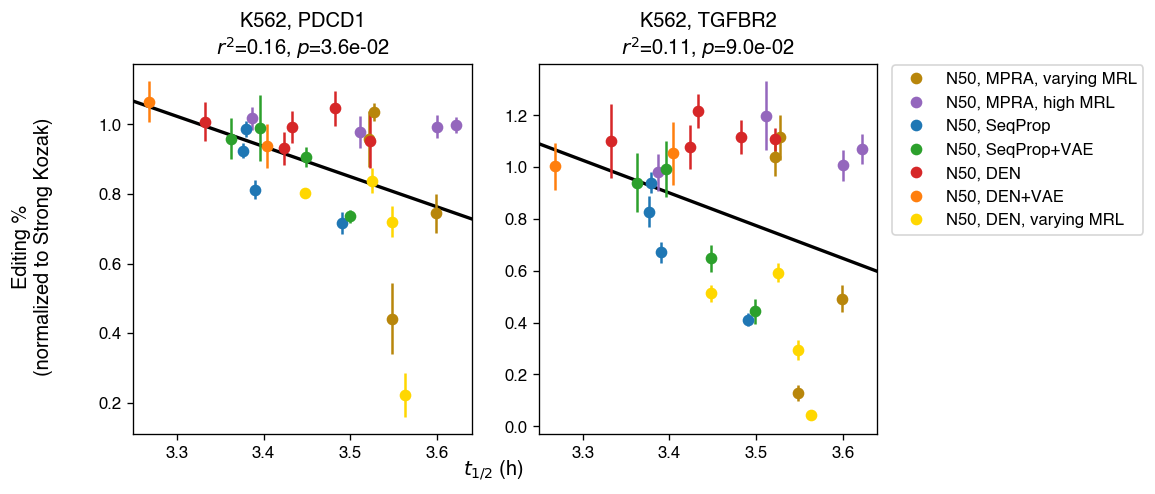

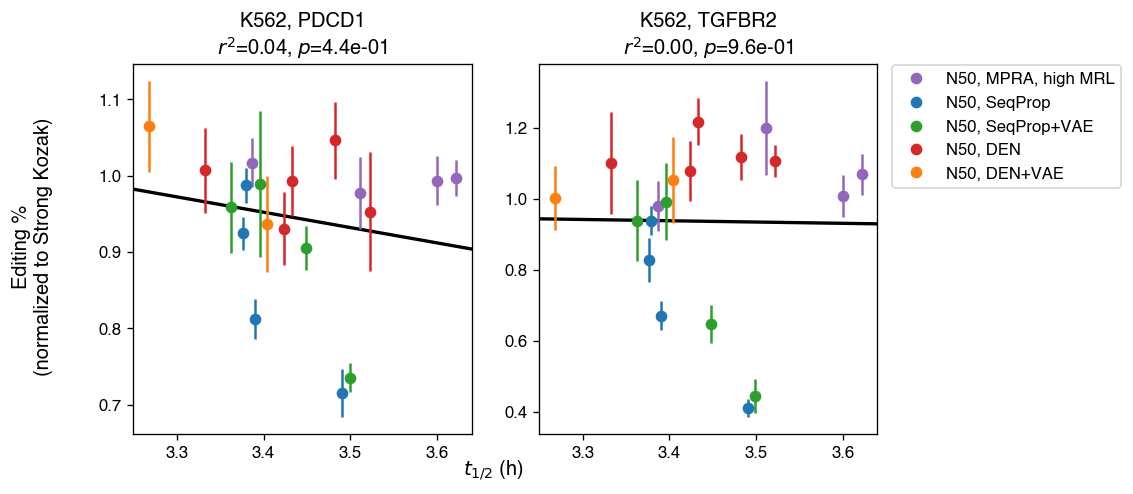

In [23]:
fig, ax = plot_vs_predicted_mrl(
    df=stab_t2_df,
    col_x='t_1/2',
    xlabel='$t_{1/2}$ (h)',
)
fig.savefig('stability_t_1_2_vs_predicted_MRL_all_designs.pdf', bbox_inches='tight')

fig, ax = plot_vs_predicted_mrl(
    df=stab_t2_df,
    col_x='t_1/2',
    seq_ids_to_plot=seq_ids_no_var,
    xlabel='$t_{1/2}$ (h)',
)
fig.savefig('stability_t_1_2_vs_predicted_MRL_max_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=stab_t2_df,
    col_x='t_1/2',
    xlabel='$t_{1/2}$ (h)',
)
fig.savefig('editing_vs_stability_t_1_2_all_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=stab_t2_df,
    col_x='t_1/2',
    xlabel='$t_{1/2}$ (h)',
    seq_ids_to_plot=seq_ids_no_var,
)
fig.savefig('editing_vs_stability_t_1_2_max_designs.pdf', bbox_inches='tight')

# Integrated abundance

In [24]:
# Linear interpolation in log scale
def log_interp(x, xp, yp):
    log_x = numpy.log10(x)
    log_xp = numpy.log10(xp)
    log_yp = numpy.log10(yp)
    log_y = numpy.interp(log_x, log_xp, log_yp)
    return 10**log_y

def lin_interp(x, xp, yp):
    return numpy.interp(x, xp, yp)

interp_fxn = lin_interp

# For a given sequence, integrate its timecourse over time using log interpolation
for seq_id in seq_ids:
    seq_abundance_int, _ = scipy.integrate.quad(
        lambda t: interp_fxn(t, stab_time, stab_conc_df.loc[seq_id, stab_libs].values.astype(float)),
        0.5,
        24,
    )
    stab_conc_df.loc[seq_id, 'seq_abundance_int'] = seq_abundance_int

stab_conc_df

C:\Users\casti\AppData\Local\Temp\ipykernel_32324\3773388708.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  seq_abundance_int, _ = scipy.integrate.quad(
C:\Users\casti\AppData\Local\Temp\ipykernel_32324\3773388708.py:16: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  seq_abundance_int, _ = scipy.integrate.quad(


stab_1    stab_2    stab_3    stab_4    stab_5    stab_6  \
seq_name                                                                
seq_1      0.838570  0.609647  0.370235  0.202001  0.089644  0.006587   
seq_2      0.743907  0.497496  0.348402  0.225810  0.106069  0.006223   
seq_3      0.731475  0.540285  0.366485  0.233172  0.093772  0.005927   
seq_4      0.719862  0.551920  0.340097  0.204221  0.067370  0.005909   
seq_5      0.736022  0.535860  0.355105  0.211019  0.057641  0.006650   
seq_6      0.847631  0.583724  0.366178  0.200531  0.045475  0.005538   
seq_7      0.696324  0.532176  0.364777  0.214260  0.053253  0.005906   
seq_8      0.693509  0.567725  0.299563  0.173037  0.047378  0.006430   
seq_13     0.696879  0.547614  0.304530  0.188345  0.053336  0.004672   
seq_14     0.620822  0.394598  0.252362  0.129343  0.026636  0.003908   
seq_15     0.717196  0.534988  0.310622  0.174747  0.038109  0.004764   
seq_16     0.653327  0.394160  0.237900  0.109770  0.027507  0.004365   
seq_17     0.720730  0.494630  0.311295  0.180334  0.040710  0.004567   
seq_18     0.750613  0.523127  0.315050  0.171379  0.040426  0.004918   
seq_19     0.785692  0.533622  0.293433  0.163130  0.039243  0.005279   
seq_20     0.708263  0.473898  0.238271  0.122479  0.036113  0.004787   
seq_28     0.701062  0.561346  0.343448  0.191025  0.029464  0.004794   
seq_29     0.904266  0.608908  0.415913  0.227324  0.061683  0.006714   
seq_30     0.725693  0.513208  0.340395  0.170284  0.039335  0.005133   
seq_31     0.735831  0.539544  0.316355  0.199416  0.045545  0.005262   
seq_32     0.692632  0.482171  0.287714  0.155424  0.044301  0.005270   
seq_33     0.817306  0.509462  0.310570  0.174045  0.038384  0.005098   
seq_34     0.723805  0.543797  0.325161  0.201106  0.044951  0.004186   
seq_35     0.838120  0.622713  0.413394  0.215513  0.080209  0.007085   
seq_36     0.822987  0.625528  0.414627  0.214930  0.102357  0.006785   
seq_37     0.802197  0.550654  0.351995  0.192083  0.092876  0.005376   
seq_38     0.797073  0.586636  0.392797  0.231865  0.109656  0.006329   
spikein_1       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_2       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_3       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_4       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_5       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_6       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_7       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_8       NaN       NaN       NaN       NaN       NaN       NaN   

             N50 MRL  Optimus MRL             Description  \
seq_name                                                    
seq_1       2.142014     1.869994  N50, MPRA, varying MRL   
seq_2       3.497435     3.500646  N50, MPRA, varying MRL   
seq_3       5.000827     5.002466  N50, MPRA, varying MRL   
seq_4       6.495498     6.496485  N50, MPRA, varying MRL   
seq_5      10.360462     7.823140     N50, MPRA, high MRL   
seq_6       9.309283     7.739455     N50, MPRA, high MRL   
seq_7       9.225635     7.644577     N50, MPRA, high MRL   
seq_8       8.996744     7.939284     N50, MPRA, high MRL   
seq_13           NaN     8.296752            N50, SeqProp   
seq_14           NaN     8.129437            N50, SeqProp   
seq_15           NaN     7.935947            N50, SeqProp   
seq_16           NaN     7.910669            N50, SeqProp   
seq_17           NaN     7.858076        N50, SeqProp+VAE   
seq_18           NaN     7.977843        N50, SeqProp+VAE   
seq_19           NaN     7.849075        N50, SeqProp+VAE   
seq_20           NaN     7.926457        N50, SeqProp+VAE   
seq_28           NaN     9.757784                N50, DEN   
seq_29           NaN     9.343899                N50, DEN   
seq_30           NaN     9.214127                N50, DEN   
seq_31           NaN     9.167

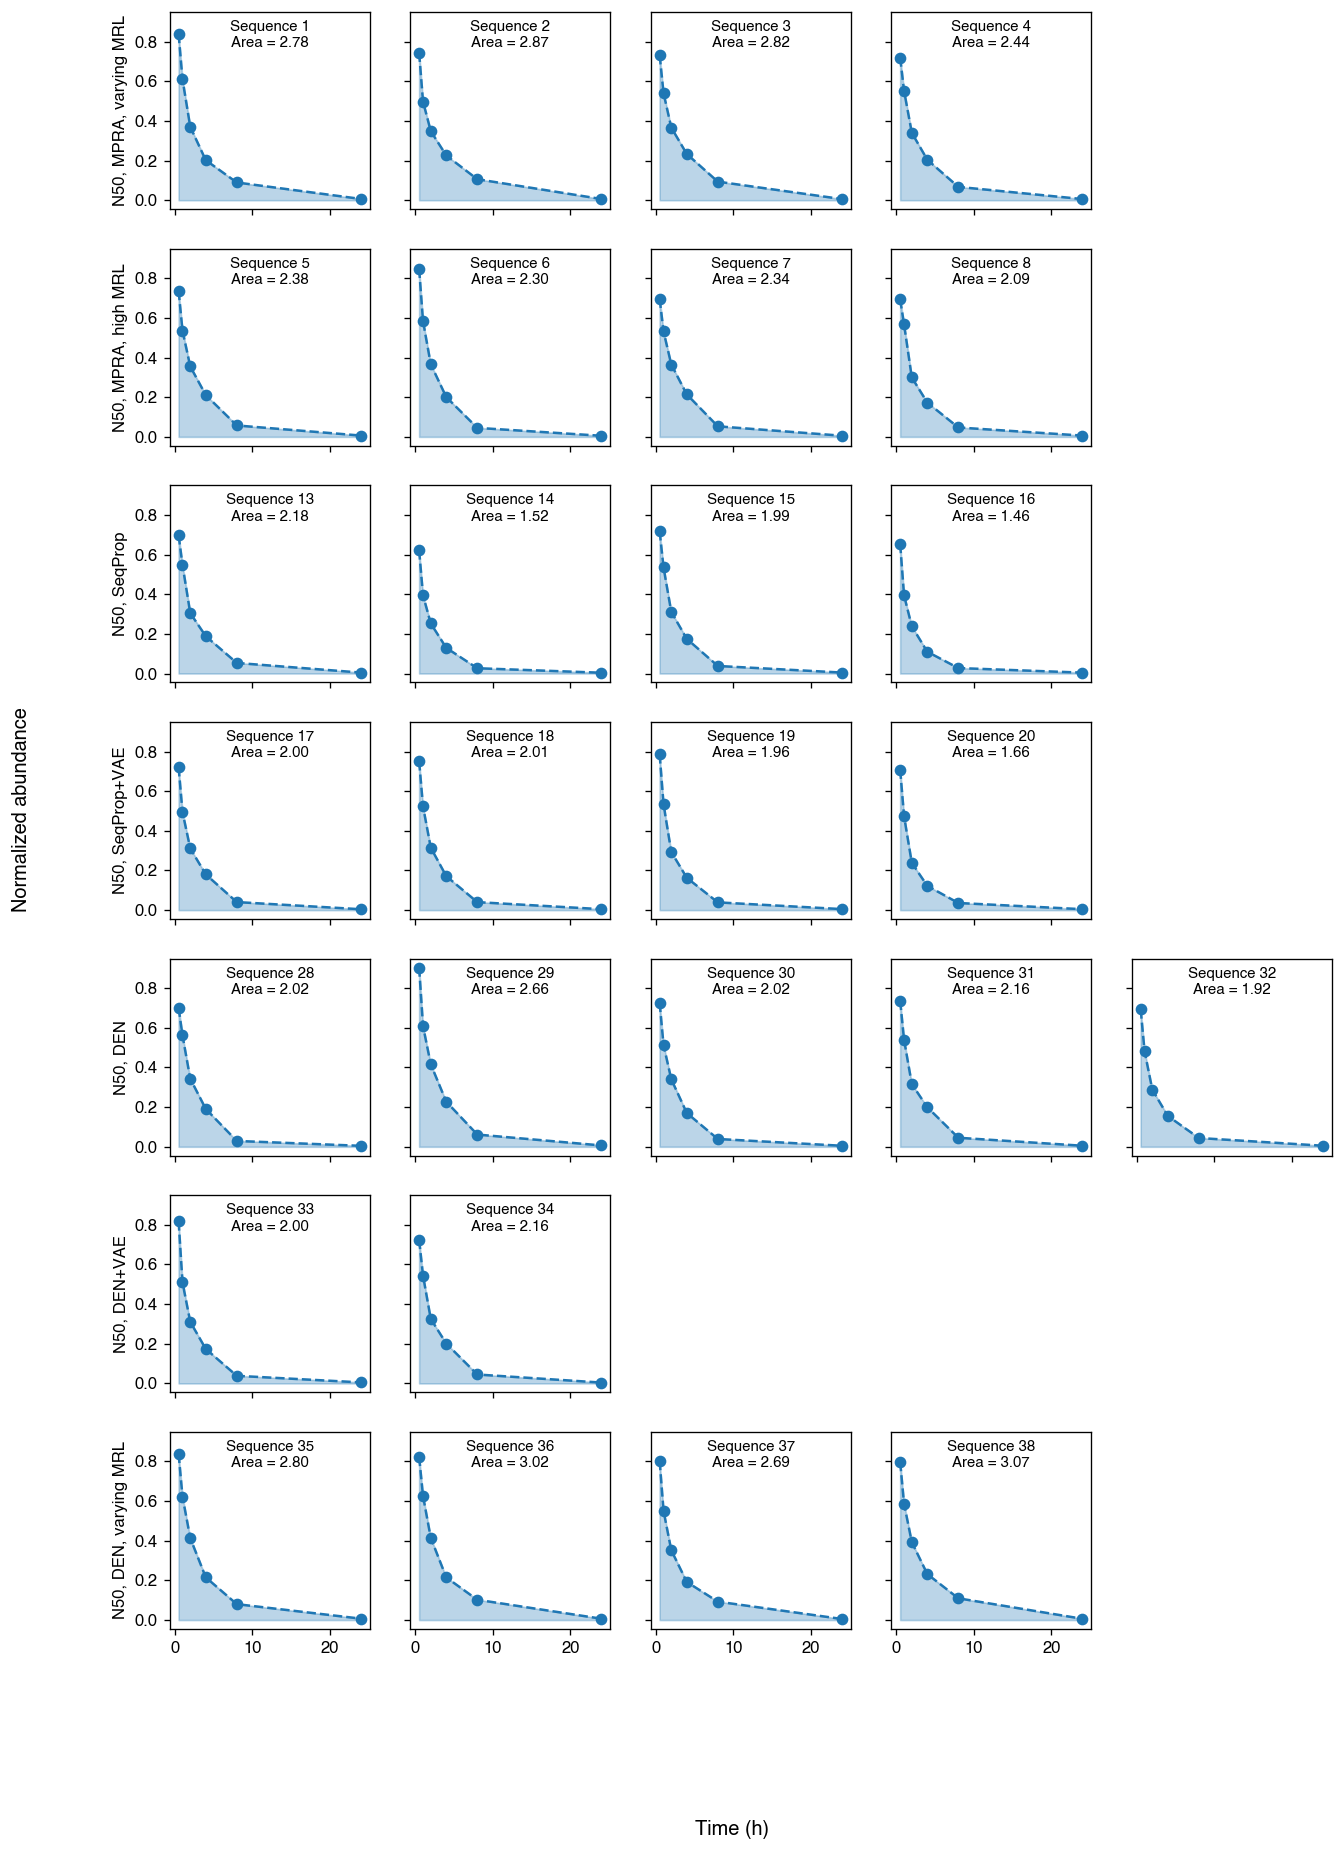

In [25]:
# Plot timecourses with interpolation
fig, axes = pyplot.subplots(nrows, ncols, figsize=(2.5*ncols, 2.5*nrows), sharey=True, sharex=True)
for ax in axes.ravel():
    ax.axis("off")

for description_idx, description in enumerate(design_descriptions):
    description_df = stab_conc_df[stab_conc_df['Description'] == description]
    for seq_idx, seq_id in enumerate(description_df.index):
        t = numpy.array(stab_time)
        y = description_df.loc[seq_id, stab_libs].astype(float).values

        ax = axes[description_idx, seq_idx]
        ax.axis("on")
        ax.plot(t, y, 'o', color='tab:blue', label=seq_id)

        t_cont_plot = numpy.linspace(0.5, 24, 100)
        y_cont_plot = interp_fxn(t_cont_plot, stab_time, stab_conc_df.loc[seq_id, stab_libs].values.astype(float))
        ax.plot(t_cont_plot, y_cont_plot, linestyle='--', color='tab:blue')

        ax.fill_between(t_cont_plot, y_cont_plot, color='tab:blue', alpha=0.3)

        # ax.set_yscale('log')
        # ax.set_title(
        #     "Sequence {}\nPred. MRL = {:.2f}".format(
        #         seq_id.split('_')[1],
        #         stab_conc_df.loc[seq_id, 'Optimus MRL'],
        #     ),
        #     y=0.77,
        #     fontsize=9,
        # )
        ax.set_title(
            "Sequence {}\nArea = {:.2f}".format(
                seq_id.split('_')[1],
                stab_conc_df.loc[seq_id, 'seq_abundance_int'],
            ),
            y=0.77,
            fontsize=9,
        )
        if seq_idx == 0:
            ax.set_ylabel(description)

        stab_t2[seq_id] = numpy.log(2)/params[1]

fig.supxlabel('Time (h)')
fig.supylabel('Normalized abundance')
fig.savefig('stability_timecourse_with_integrated_area_linscale.pdf', bbox_inches='tight')

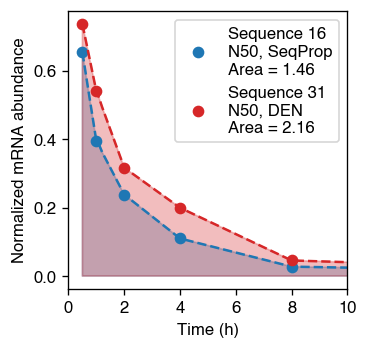

In [26]:
# Plot a few examples in the same plot
seq_ids_to_plot = ['seq_16', 'seq_31']
fig, ax = pyplot.subplots(figsize=(3, 3))

for seq_idx, seq_id in enumerate(seq_ids_to_plot):
    t = numpy.array(stab_time)
    y = stab_conc_df.loc[seq_id, stab_libs].astype(float).values

    label = "Sequence {}\n{}\nArea = {:.2f}".format(
        seq_id.split('_')[1],
        stab_conc_df.loc[seq_id, 'Description'],
        stab_conc_df.loc[seq_id, 'seq_abundance_int'],
    )
    p = ax.plot(t, y, 'o', label=label, color=seq_colors_dict[stab_conc_df.loc[seq_id, 'Description']])
    line_color = p[0].get_color()

    t_cont_plot = numpy.linspace(0.5, 24, 100)
    y_cont_plot = interp_fxn(t_cont_plot, stab_time, stab_conc_df.loc[seq_id, stab_libs].values.astype(float))
    ax.plot(t_cont_plot, y_cont_plot, linestyle='--', color=line_color)

    ax.fill_between(t_cont_plot, y_cont_plot, alpha=0.3, color=line_color)

# ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')
ax.legend()
ax.set_xlim(0, 10)
ax.set_xlabel('Time (h)')
ax.set_ylabel('Normalized mRNA abundance')
fig.savefig('integrated_abundance_example.pdf', bbox_inches='tight')

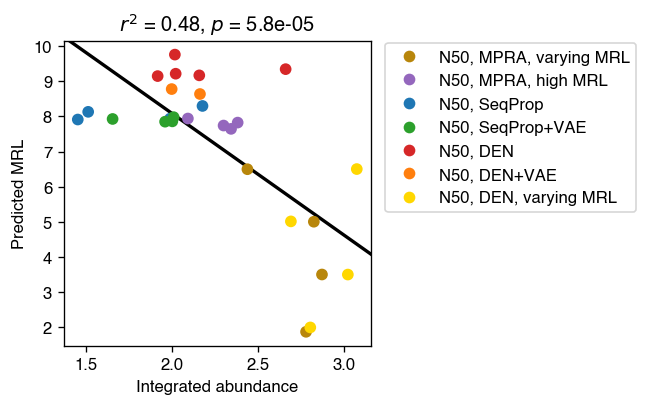

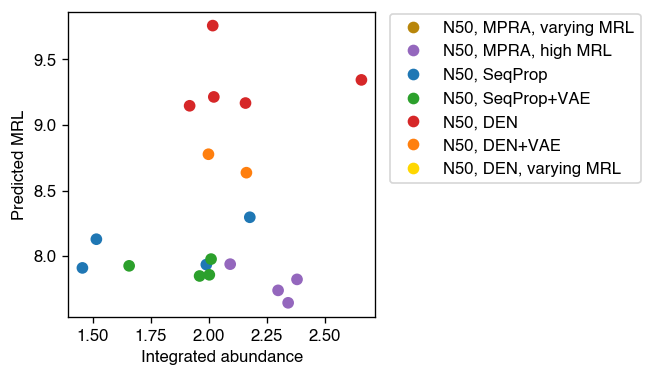

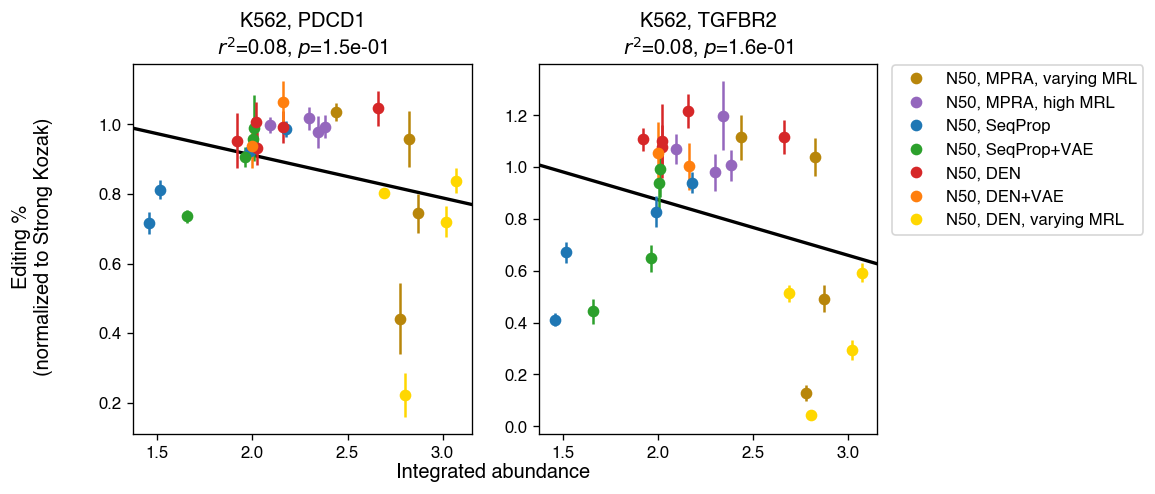

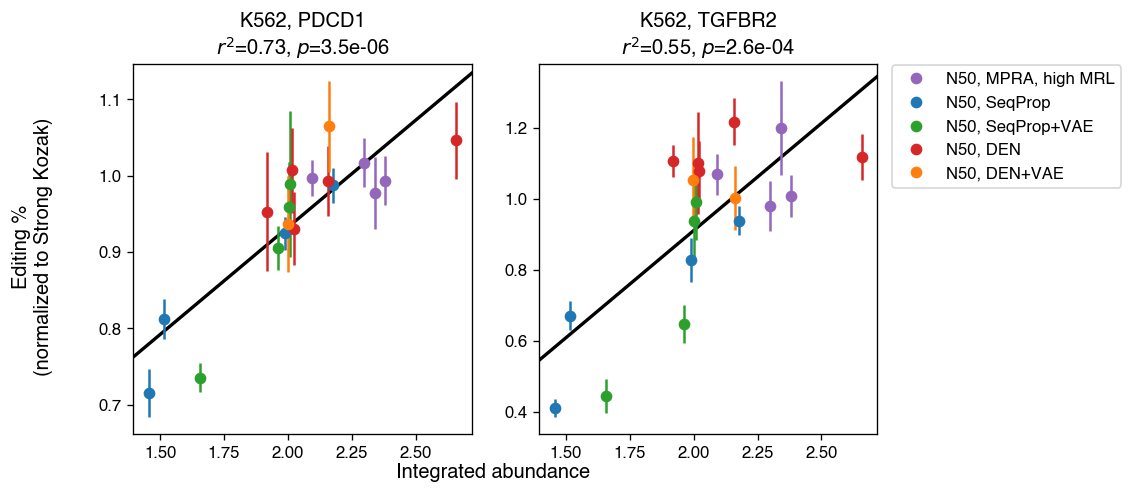

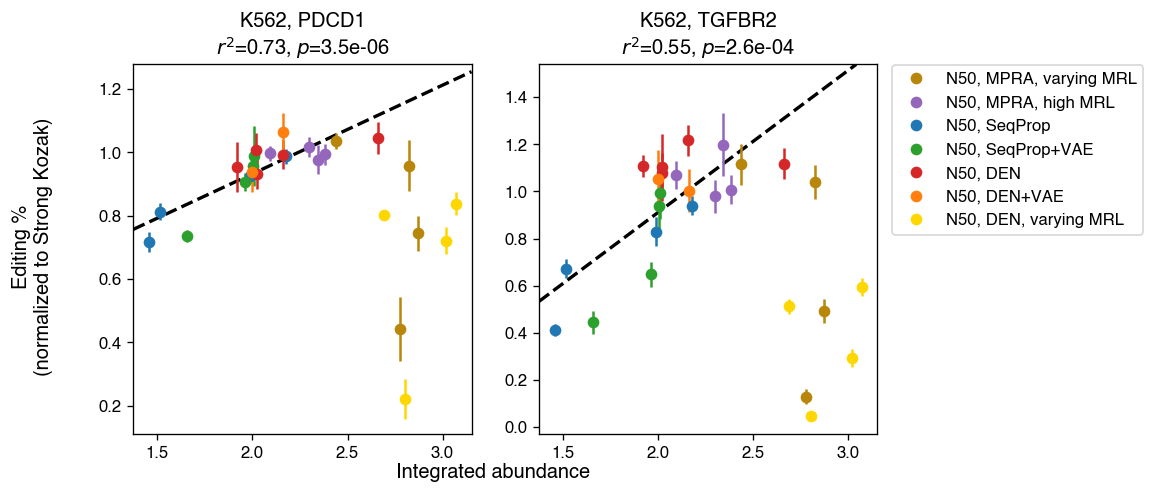

In [27]:
fig, ax = plot_vs_predicted_mrl(
    df=stab_conc_df,
    col_x='seq_abundance_int',
    xlabel='Integrated abundance',
    linreg=True,
)
fig.savefig('stability_integrated_abundance_vs_predicted_MRL_all_designs.pdf', bbox_inches='tight')

fig, ax = plot_vs_predicted_mrl(
    df=stab_conc_df,
    col_x='seq_abundance_int',
    seq_ids_to_plot=seq_ids_no_var,
    xlabel='Integrated abundance',
    linreg=False,
)
fig.savefig('stability_integrated_abundance_vs_predicted_MRL_max_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=stab_conc_df,
    col_x='seq_abundance_int',
    xlabel='Integrated abundance',
)
fig.savefig('stability_integrated_abundance_vs_editing_all_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=stab_conc_df,
    col_x='seq_abundance_int',
    xlabel='Integrated abundance',
    seq_ids_to_plot=seq_ids_no_var,
)
fig.savefig('stability_integrated_abundance_vs_editing_max_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=stab_conc_df,
    col_x='seq_abundance_int',
    xlabel='Integrated abundance',
    linreg_seq_ids=seq_ids_no_var,
    ylim_upper_scale=1.1,
)
fig.savefig('stability_integrated_abundance_vs_editing_all_designs_max_linreg.pdf', bbox_inches='tight')

In [28]:
stab_conc_df.sort_values('seq_abundance_int')

stab_1    stab_2    stab_3    stab_4    stab_5    stab_6  \
seq_name                                                                
seq_16     0.653327  0.394160  0.237900  0.109770  0.027507  0.004365   
seq_14     0.620822  0.394598  0.252362  0.129343  0.026636  0.003908   
seq_20     0.708263  0.473898  0.238271  0.122479  0.036113  0.004787   
seq_32     0.692632  0.482171  0.287714  0.155424  0.044301  0.005270   
seq_19     0.785692  0.533622  0.293433  0.163130  0.039243  0.005279   
seq_15     0.717196  0.534988  0.310622  0.174747  0.038109  0.004764   
seq_33     0.817306  0.509462  0.310570  0.174045  0.038384  0.005098   
seq_17     0.720730  0.494630  0.311295  0.180334  0.040710  0.004567   
seq_18     0.750613  0.523127  0.315050  0.171379  0.040426  0.004918   
seq_28     0.701062  0.561346  0.343448  0.191025  0.029464  0.004794   
seq_30     0.725693  0.513208  0.340395  0.170284  0.039335  0.005133   
seq_8      0.693509  0.567725  0.299563  0.173037  0.047378  0.006430   
seq_31     0.735831  0.539544  0.316355  0.199416  0.045545  0.005262   
seq_34     0.723805  0.543797  0.325161  0.201106  0.044951  0.004186   
seq_13     0.696879  0.547614  0.304530  0.188345  0.053336  0.004672   
seq_6      0.847631  0.583724  0.366178  0.200531  0.045475  0.005538   
seq_7      0.696324  0.532176  0.364777  0.214260  0.053253  0.005906   
seq_5      0.736022  0.535860  0.355105  0.211019  0.057641  0.006650   
seq_4      0.719862  0.551920  0.340097  0.204221  0.067370  0.005909   
seq_29     0.904266  0.608908  0.415913  0.227324  0.061683  0.006714   
seq_37     0.802197  0.550654  0.351995  0.192083  0.092876  0.005376   
seq_1      0.838570  0.609647  0.370235  0.202001  0.089644  0.006587   
seq_35     0.838120  0.622713  0.413394  0.215513  0.080209  0.007085   
seq_3      0.731475  0.540285  0.366485  0.233172  0.093772  0.005927   
seq_2      0.743907  0.497496  0.348402  0.225810  0.106069  0.006223   
seq_36     0.822987  0.625528  0.414627  0.214930  0.102357  0.006785   
seq_38     0.797073  0.586636  0.392797  0.231865  0.109656  0.006329   
spikein_1       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_2       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_3       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_4       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_5       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_6       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_7       NaN       NaN       NaN       NaN       NaN       NaN   
spikein_8       NaN       NaN       NaN       NaN       NaN       NaN   

             N50 MRL  Optimus MRL             Description  \
seq_name                                                    
seq_16           NaN     7.910669            N50, SeqProp   
seq_14           NaN     8.129437            N50, SeqProp   
seq_20           NaN     7.926457        N50, SeqProp+VAE   
seq_32           NaN     9.146587                N50, DEN   
seq_19           NaN     7.849075        N50, SeqProp+VAE   
seq_15           NaN     7.935947            N50, SeqProp   
seq_33           NaN     8.777226            N50, DEN+VAE   
seq_17           NaN     7.858076        N50, SeqProp+VAE   
seq_18           NaN     7.977843        N50, SeqProp+VAE   
seq_28           NaN     9.757784                N50, DEN   
seq_30           NaN     9.214127                N50, DEN   
seq_8       8.996744     7.939284     N50, MPRA, high MRL   
seq_31           NaN     9.167394                N50, DEN   
seq_34           NaN     8.636530            N50, DEN+VAE   
seq_13           NaN     8.296752            N50, SeqProp   
seq_6       9.309283     7.739455     N50, MPRA, high MRL   
seq_7       9.225635     7.644577     N50, MPRA, high MRL   
seq_5      10.360462     7.823140     N50, MPRA, high MRL   
seq_4       6.495498     6.496485  N50, MPRA, varying MRL   
seq_29           NaN     9.343

In [29]:
# export integrated abundances
stab_conc_df.to_csv('stability_timecourse_integrated_abundances.csv')

In [30]:
# export sequences for motif analysis
stab_conc_sorted_df = stab_conc_df.loc[seq_ids].sort_values('seq_abundance_int')
n_seqs = 6

high_ia_seq_ids = stab_conc_sorted_df.iloc[n_seqs:].index
high_ia_seqs_df = counts_df.loc[high_ia_seq_ids, ['seq']]
# Save sequences to fasta
with open('high_ia_seqs.fa', 'w') as f:
    for seq_id, seq in high_ia_seqs_df.itertuples(index=True):
        f.write(f">{seq_id}\n{seq}\n")

low_ia_seq_ids = stab_conc_sorted_df.iloc[:n_seqs].index
low_ia_seqs_df = counts_df.loc[low_ia_seq_ids, ['seq']]
# Save sequences to fasta
with open('low_ia_seqs.fa', 'w') as f:
    for seq_id, seq in low_ia_seqs_df.itertuples(index=True):
        f.write(f">{seq_id}\n{seq}\n")

Run one of the following
```
meme -oc meme_low_ia_vs_high -objfun de -neg high_ia_seqs.fa -hsfrac 0.666666 -rna -minw 5 -maxw 10 -nmotifs 10 low_ia_seqs.fa
```

# Translation analysis

In [31]:
pol_cols = [c for c in counts_df.columns if c.startswith('polprof') and not c.endswith('_total')]
pol_weights = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# pol_cols = pol_cols[:10]
# pol_weights = pol_weights[:10]
pol_nonzero_cols = pol_cols[1:]
pol_nonzero_weights = pol_weights[1:]
pol_total_col = 'polprof_total'

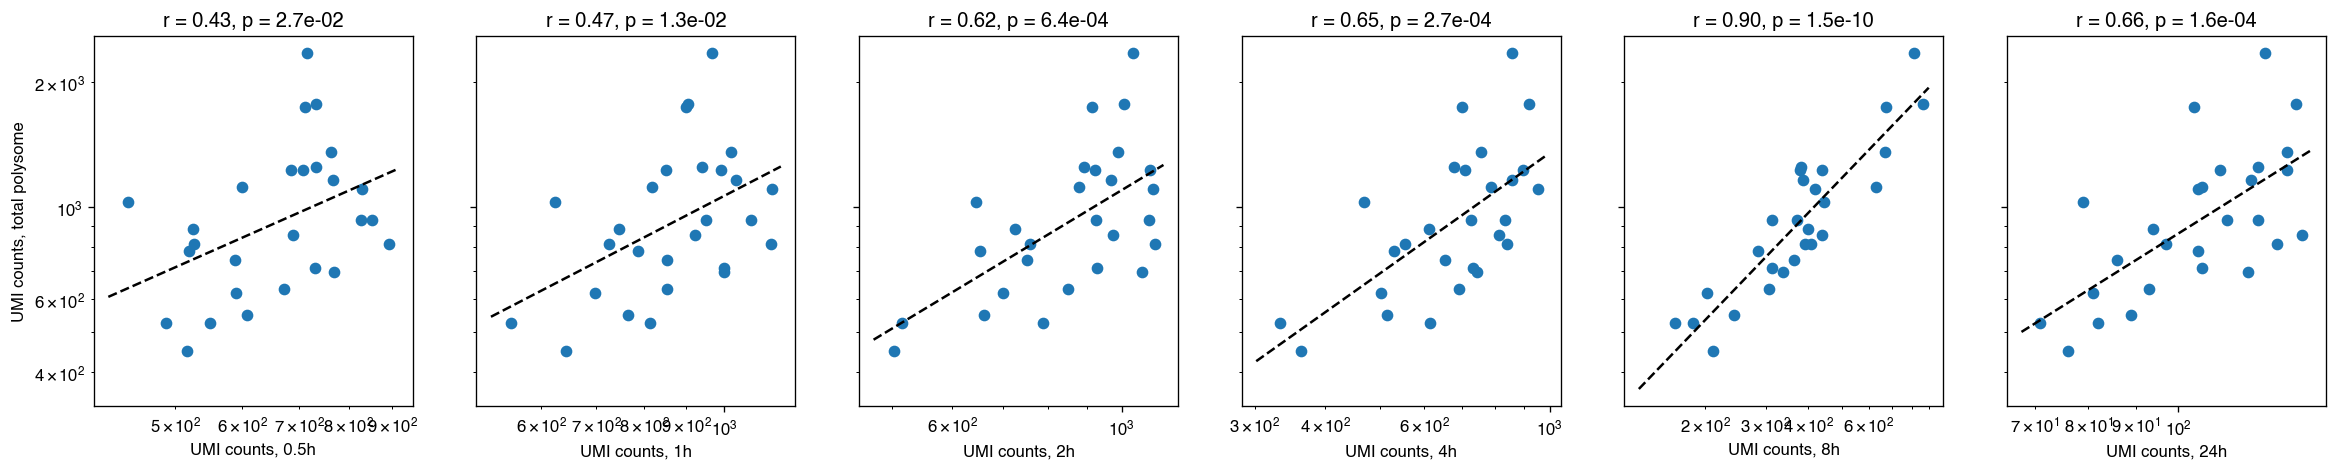

In [32]:
# Does the total fraction correlate with any of the stability counts?
fig, axes = pyplot.subplots(1, len(stab_libs), figsize=(4*len(stab_libs), 4), sharey=True)

for lib_idx, stab_lib in enumerate(stab_libs):
    ax = axes[lib_idx]
    ax.scatter(
        counts_df.loc[seq_ids, stab_lib],
        counts_df.loc[seq_ids, pol_total_col],
    )

    # linear regression
    lrres = scipy.stats.linregress(
        numpy.log10(counts_df.loc[seq_ids, stab_lib]),
        numpy.log10(counts_df.loc[seq_ids, pol_total_col]),
    )
    xlim = ax.get_xlim()
    xvals = numpy.logspace(numpy.log10(xlim[0]), numpy.log10(xlim[1]), 100)
    ax.plot(xvals, 10**(lrres.intercept + lrres.slope * numpy.log10(xvals)), color='k', linestyle='--')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(f'UMI counts, {stab_time[lib_idx]}h')
    if lib_idx == 0:
        ax.set_ylabel('UMI counts, total polysome')
    ax.set_title(f"r = {lrres.rvalue:.2f}, p = {lrres.pvalue:.1e}")

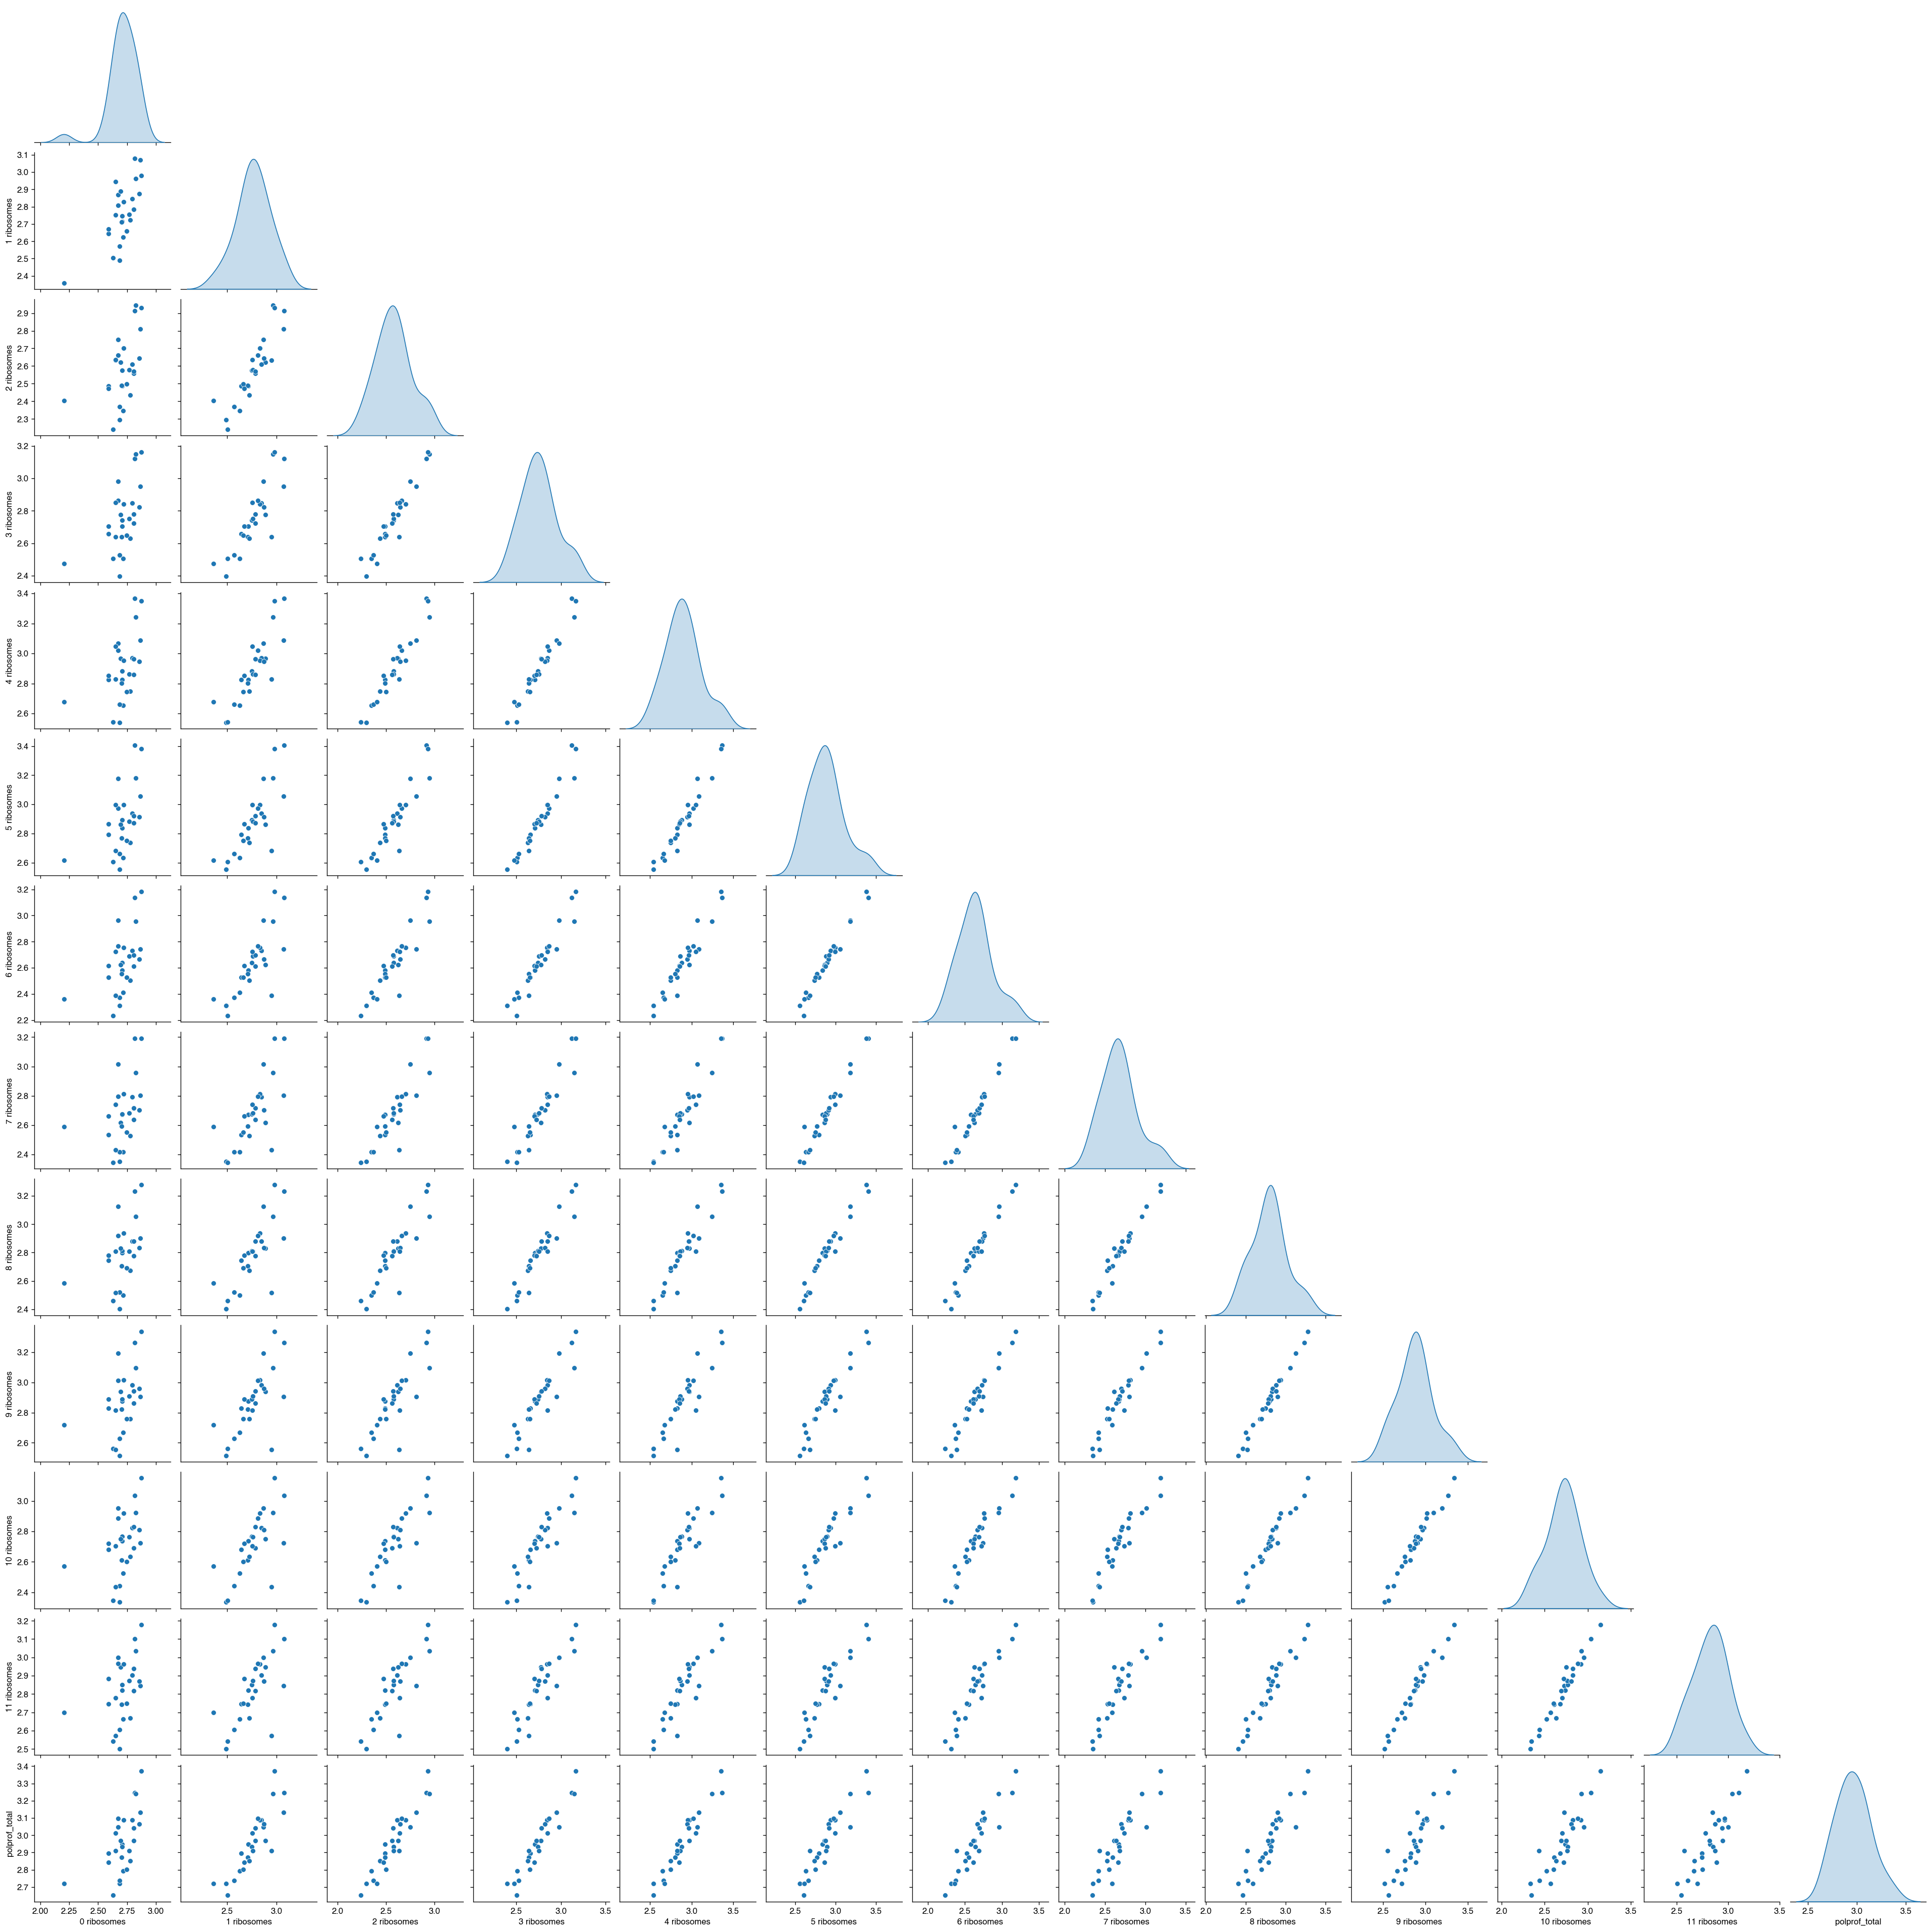

In [33]:
# Correlation of all vs all polysome fractions
seaborn.pairplot(
    numpy.log10(
        counts_df.loc[seq_ids, pol_cols + [pol_total_col]].rename(columns={pol_cols[l]: f"{pol_weights[l]} ribosomes" for l in range(len(pol_cols))})
    ),
    diag_kind='kde',
    corner=True,
)

In [34]:
# Subset and normalize
polprof_df = counts_df.loc[seq_ids, pol_cols + [pol_total_col]]
display(polprof_df)
polprof_df = polprof_df / polprof_df.sum(axis=0)
polprof_df = pandas.concat([polprof_df, counts_df.loc[seq_ids, info_cols]], axis=1)
polprof_df

polprof_0  polprof_1  polprof_2  polprof_3  polprof_4  polprof_5  \
seq_name                                                                     
seq_1           733       1178        644        889       1221       1135   
seq_2           656       1196        817       1323       2325       2552   
seq_3           471        739        562        956       1171       1507   
seq_4           512        518        306        506        668        688   
seq_5           511        559        375        551        764        785   
seq_6           497        774        418        596        929        730   
seq_7           626        699        408        706        930        870   
seq_8           389        440        306        454        669        619   
seq_13          504        513        308        437        632        585   
seq_14          523        422        222        321        449        429   
seq_15          598        528        272        425        559        546   
seq_16          485        308        197        250        346        359   
seq_17          557        457        315        444        557        564   
seq_18          590        571        379        565        728        761   
seq_19          488        373        234        337        458        458   
seq_20          427        319        174        320        350        405   
seq_28          160        229        253        299        474        412   
seq_29          529        673        502        694        895        990   
seq_30          390        469        296        505        712        733   
seq_31          720        748        442        664        881        823   
seq_32          470        642        458        730       1049        943   
seq_33          642        610        362        527        720        746   
seq_34          641        610        372        602        918        831   
seq_35          449        883        430        435        674        482   
seq_36          447        566        433        707       1114        992   
seq_37          673        918        880       1412       1745       1510   
seq_38          747        953        854       1454       2239       2404   

          polprof_6  polprof_7  polprof_8  polprof_9  polprof_10  polprof_11  \
seq_name                                                                       
seq_1           555        634        795        803         531         702   
seq_2          1364       1551       1707       1842        1088        1264   
seq_3           920       1035       1331       1565         897        1001   
seq_4           380        469        626        750         545         663   
seq_5           436        472        651        772         587         708   
seq_6           421        413        674        869         562         885   
seq_7           537        619        760        962         667         801   
seq_8           336        343        557        673         481         557   
seq_13          358        392        508        662         407         552   
seq_14          258        261        316        465         334         461   
seq_15          320        337        472        572         431         467   
seq_16          205        225        253        327         216         317   
seq_17          336        357        493        575         400         560   
seq_18          487        480        645        813         580         745   
seq_19          235        262        333        423         276         402   
seq_20          171        222        289        365         222         348   
seq_28          229        387        385        522         372         499   
seq_29          570        648        867       1040         831         921   
seq_30          413        459        605        775         525         765   
seq_31          463        505        683        914         644   

polprof_0  polprof_1  polprof_2  polprof_3  polprof_4  polprof_5  \
seq_name                                                                     
seq_1      0.050779   0.069725   0.057403   0.051961   0.050503   0.047571   
seq_2      0.045445   0.070790   0.072823   0.077328   0.096166   0.106962   
seq_3      0.032629   0.043741   0.050094   0.055877   0.048434   0.063163   
seq_4      0.035469   0.030660   0.027275   0.029575   0.027630   0.028836   
seq_5      0.035400   0.033087   0.033425   0.032205   0.031600   0.032902   
seq_6      0.034430   0.045812   0.037258   0.034835   0.038425   0.030596   
seq_7      0.043367   0.041373   0.036367   0.041265   0.038466   0.036464   
seq_8      0.026948   0.026043   0.027275   0.026536   0.027671   0.025944   
seq_13     0.034915   0.030364   0.027453   0.025542   0.026141   0.024519   
seq_14     0.036231   0.024978   0.019788   0.018762   0.018571   0.017981   
seq_15     0.041427   0.031252   0.024245   0.024841   0.023121   0.022884   
seq_16     0.033599   0.018230   0.017559   0.014612   0.014311   0.015047   
seq_17     0.038587   0.027049   0.028077   0.025951   0.023038   0.023639   
seq_18     0.040873   0.033797   0.033782   0.033024   0.030111   0.031896   
seq_19     0.033807   0.022078   0.020857   0.019697   0.018944   0.019196   
seq_20     0.029581   0.018881   0.015509   0.018704   0.014477   0.016975   
seq_28     0.011084   0.013554   0.022551   0.017476   0.019605   0.017268   
seq_29     0.036647   0.039834   0.044746   0.040563   0.037019   0.041494   
seq_30     0.027018   0.027760   0.026384   0.029517   0.029449   0.030722   
seq_31     0.049879   0.044273   0.039397   0.038810   0.036440   0.034494   
seq_32     0.032560   0.037999   0.040824   0.042668   0.043388   0.039524   
seq_33     0.044475   0.036105   0.032267   0.030803   0.029780   0.031267   
seq_34     0.044406   0.036105   0.033158   0.035186   0.037970   0.034830   
seq_35     0.031105   0.052264   0.038328   0.025425   0.027878   0.020202   
seq_36     0.030966   0.033501   0.038595   0.041323   0.046077   0.041578   
seq_37     0.046623   0.054336   0.078438   0.082530   0.072176   0.063288   
seq_38     0.051749   0.056407   0.076121   0.084985   0.092609   0.100759   

          polprof_6  polprof_7  polprof_8  polprof_9  polprof_10  polprof_11  \
seq_name                                                                       
seq_1      0.040579   0.042459   0.041547   0.035273    0.034108    0.036221   
seq_2      0.099729   0.103871   0.089208   0.080914    0.069887    0.065219   
seq_3      0.067266   0.069314   0.069558   0.068746    0.057618    0.051649   
seq_4      0.027784   0.031409   0.032715   0.032945    0.035008    0.034209   
seq_5      0.031878   0.031610   0.034021   0.033912    0.037706    0.036531   
seq_6      0.030782   0.027659   0.035223   0.038173    0.036100    0.045663   
seq_7      0.039263   0.041455   0.039718   0.042258    0.042844    0.041329   
seq_8      0.024567   0.022971   0.029109   0.029563    0.030897    0.028739   
seq_13     0.026175   0.026252   0.026548   0.029080    0.026143    0.028482   
seq_14     0.018864   0.017479   0.016514   0.020426    0.021454    0.023786   
seq_15     0.023397   0.022569   0.024667   0.025126    0.027685    0.024096   
seq_16     0.014989   0.015068   0.013222   0.014364    0.013875    0.016356   
seq_17     0.024567   0.023908   0.025764   0.025258    0.025694    0.028894   
seq_18     0.035607   0.032146   0.033708   0.035713    0.037256    0.038440   
seq_19     0.017182   0.017546   0.017403   0.018581    0.017729    0.020742   
seq_20     0.012503   0.014867   0.015103   0.016033    0.014260    0.017956   
seq_28     0.016743   0.025917   0.020120   0.022930    0.023895    0.025747   
seq_29     0.041676   0.043397   0.045310   0.045684    0.053379    0.047521   
seq_30     0.030197   0.030739   0.031617   0.034043    0.033723    0.039472   
seq_31     0.033852   0.033820   0.035694   0.040149    0.041367   

## Calculate MRL

In [35]:
# MRL
polprof_df['Measured MRL'] = (polprof_df[pol_nonzero_cols]*pol_nonzero_weights).sum(axis=1) / polprof_df[pol_nonzero_cols].sum(axis=1)
polprof_df['Measured MRL']

seq_name
seq_1     5.342109
seq_2     5.950852
seq_3     6.242685
seq_4     6.211595
seq_5     6.116597
seq_6     5.988243
seq_7     6.082036
seq_8     6.123455
seq_13    5.994974
seq_14    6.004959
seq_15    5.932868
seq_16    5.838870
seq_17    6.011820
seq_18    6.140141
seq_19    5.870100
seq_20    5.894503
seq_28    6.409106
seq_29    6.222238
seq_30    6.308042
seq_31    5.950854
seq_32    6.196320
seq_33    5.971175
seq_34    6.236446
seq_35    4.883775
seq_36    5.740556
seq_37    5.714495
seq_38    6.217759
Name: Measured MRL, dtype: float64

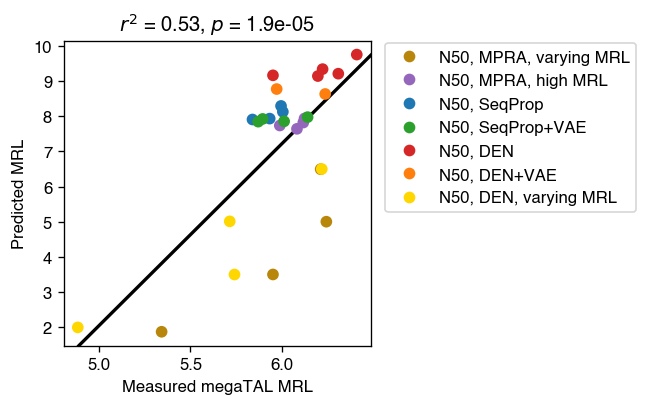

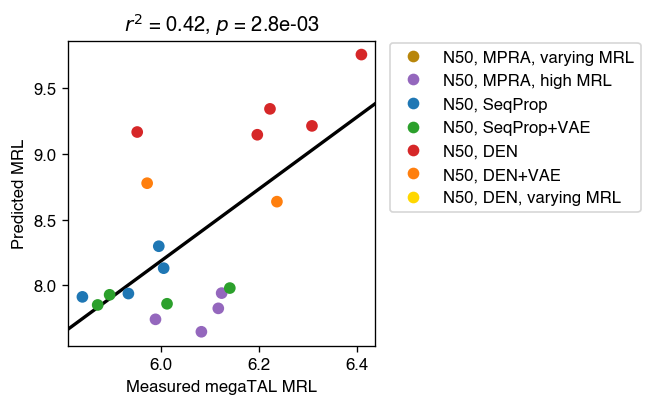

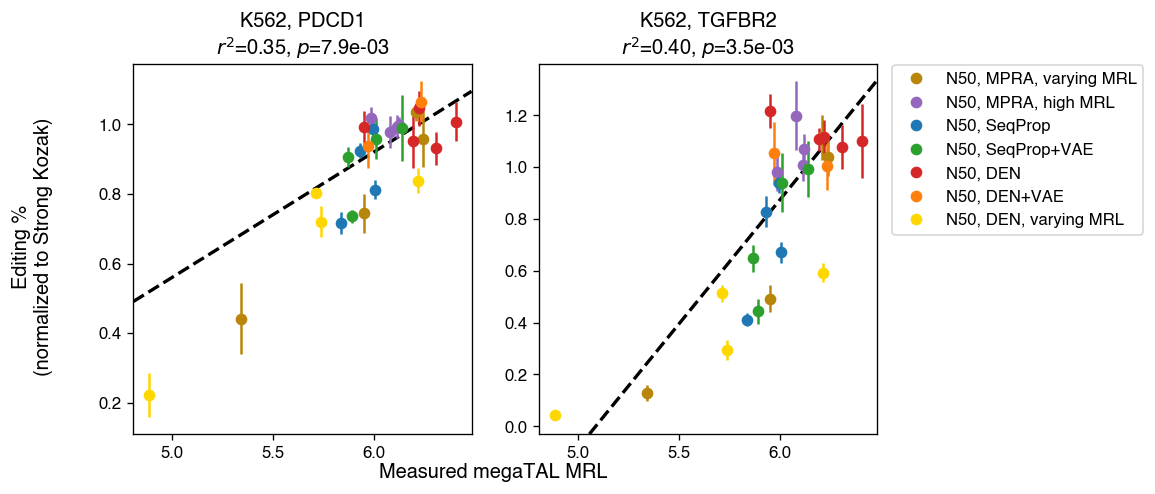

In [36]:
fig, ax = plot_vs_predicted_mrl(
    df=polprof_df,
    col_x='Measured MRL',
    xlabel='Measured megaTAL MRL',
)
fig.savefig('mrl_predicted_vs_measured_all_designs.pdf', bbox_inches='tight')

fig, ax = plot_vs_predicted_mrl(
    df=polprof_df,
    col_x='Measured MRL',
    seq_ids_to_plot=seq_ids_no_var,
    xlabel='Measured megaTAL MRL',
)
fig.savefig('mrl_predicted_vs_measured_max_designs.pdf', bbox_inches='tight')

# fig = plot_vs_editing(
#     df=polprof_df,
#     col_x='Measured MRL',
#     xlabel='Measured megaTAL MRL',
# )
# fig.savefig('editing_vs_measured_mrl_all_designs.pdf', bbox_inches='tight')

# fig = plot_vs_editing(
#     df=polprof_df,
#     col_x='Measured MRL',
#     xlabel='Measured megaTAL MRL',
#     seq_ids_to_plot=seq_ids_no_var,
# )
# fig.savefig('editing_vs_measured_mrl_max_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=polprof_df,
    col_x='Measured MRL',
    xlabel='Measured megaTAL MRL',
    linreg_seq_ids=seq_ids_no_var,
    # ylim_upper_scale=1.1,
)
# fig.savefig('editing_vs_measured_mrl_all_designs_max_linreg.pdf', bbox_inches='tight')

## Use free/total fraction ratio

In [37]:
polprof_df['free_to_total'] = polprof_df['polprof_0'] / polprof_df['polprof_total']
polprof_df

polprof_0  polprof_1  polprof_2  polprof_3  polprof_4  polprof_5  \
seq_name                                                                     
seq_1      0.050779   0.069725   0.057403   0.051961   0.050503   0.047571   
seq_2      0.045445   0.070790   0.072823   0.077328   0.096166   0.106962   
seq_3      0.032629   0.043741   0.050094   0.055877   0.048434   0.063163   
seq_4      0.035469   0.030660   0.027275   0.029575   0.027630   0.028836   
seq_5      0.035400   0.033087   0.033425   0.032205   0.031600   0.032902   
seq_6      0.034430   0.045812   0.037258   0.034835   0.038425   0.030596   
seq_7      0.043367   0.041373   0.036367   0.041265   0.038466   0.036464   
seq_8      0.026948   0.026043   0.027275   0.026536   0.027671   0.025944   
seq_13     0.034915   0.030364   0.027453   0.025542   0.026141   0.024519   
seq_14     0.036231   0.024978   0.019788   0.018762   0.018571   0.017981   
seq_15     0.041427   0.031252   0.024245   0.024841   0.023121   0.022884   
seq_16     0.033599   0.018230   0.017559   0.014612   0.014311   0.015047   
seq_17     0.038587   0.027049   0.028077   0.025951   0.023038   0.023639   
seq_18     0.040873   0.033797   0.033782   0.033024   0.030111   0.031896   
seq_19     0.033807   0.022078   0.020857   0.019697   0.018944   0.019196   
seq_20     0.029581   0.018881   0.015509   0.018704   0.014477   0.016975   
seq_28     0.011084   0.013554   0.022551   0.017476   0.019605   0.017268   
seq_29     0.036647   0.039834   0.044746   0.040563   0.037019   0.041494   
seq_30     0.027018   0.027760   0.026384   0.029517   0.029449   0.030722   
seq_31     0.049879   0.044273   0.039397   0.038810   0.036440   0.034494   
seq_32     0.032560   0.037999   0.040824   0.042668   0.043388   0.039524   
seq_33     0.044475   0.036105   0.032267   0.030803   0.029780   0.031267   
seq_34     0.044406   0.036105   0.033158   0.035186   0.037970   0.034830   
seq_35     0.031105   0.052264   0.038328   0.025425   0.027878   0.020202   
seq_36     0.030966   0.033501   0.038595   0.041323   0.046077   0.041578   
seq_37     0.046623   0.054336   0.078438   0.082530   0.072176   0.063288   
seq_38     0.051749   0.056407   0.076121   0.084985   0.092609   0.100759   

          polprof_6  polprof_7  polprof_8  polprof_9  ...  polprof_total  \
seq_name                                              ...                  
seq_1      0.040579   0.042459   0.041547   0.035273  ...       0.050618   
seq_2      0.099729   0.103871   0.089208   0.080914  ...       0.066084   
seq_3      0.067266   0.069314   0.069558   0.068746  ...       0.041690   
seq_4      0.027784   0.031409   0.032715   0.032945  ...       0.033023   
seq_5      0.031878   0.031610   0.034021   0.033912  ...       0.031940   
seq_6      0.030782   0.027659   0.035223   0.038173  ...       0.034779   
seq_7      0.039263   0.041455   0.039718   0.042258  ...       0.045799   
seq_8      0.024567   0.022971   0.029109   0.029563  ...       0.029288   
seq_13     0.026175   0.026252   0.026548   0.029080  ...       0.027868   
seq_14     0.018864   0.017479   0.016514   0.020426  ...       0.023124   
seq_15     0.023397   0.022569   0.024667   0.025126  ...       0.026598   
seq_16     0.014989   0.015068   0.013222   0.014364  ...       0.019612   
seq_17     0.024567   0.023908   0.025764   0.025258  ...       0.023609   
seq_18     0.035607   0.032146   0.033708   0.035713  ...       0.030408   
seq_19     0.017182   0.017546   0.017403   0.018581  ...       0.020434   
seq_20     0.012503   0.014867   0.015103   0.016033  ...       0.016736   
seq_28     0.016743   0.025917   0.020120   0.022930  ...       0.019575   
seq_29     0.041676   0.043397   0.045310   0.045684  ...       0.045725   
seq_30     0.030197   0.030739   0.031617   0.034043  ...       0.025963   
seq_31     0.033852   0.033820   0.035694   0.040149  ...       0.043371   
seq_32     0.042626   0.041856   0.043428   0.045289  ...       0.046658   

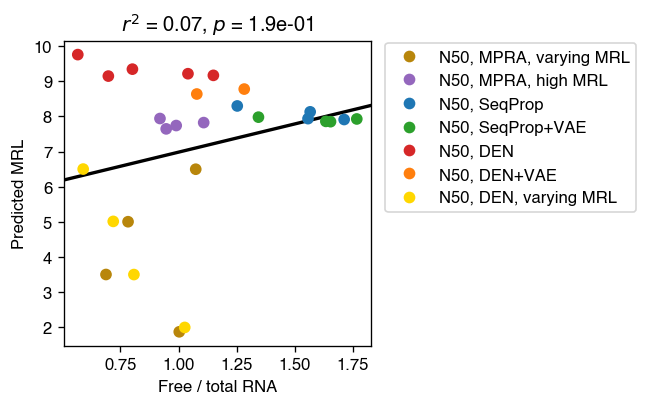

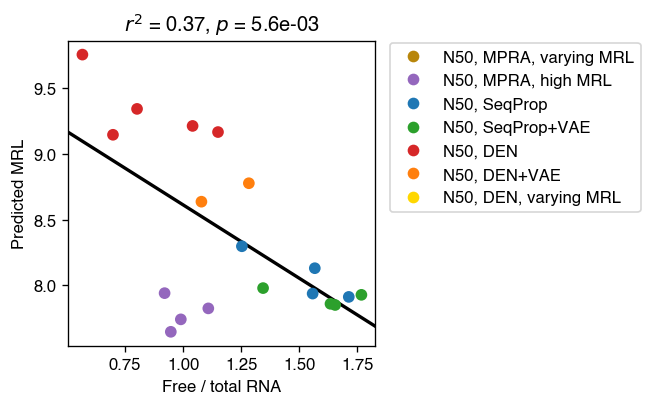

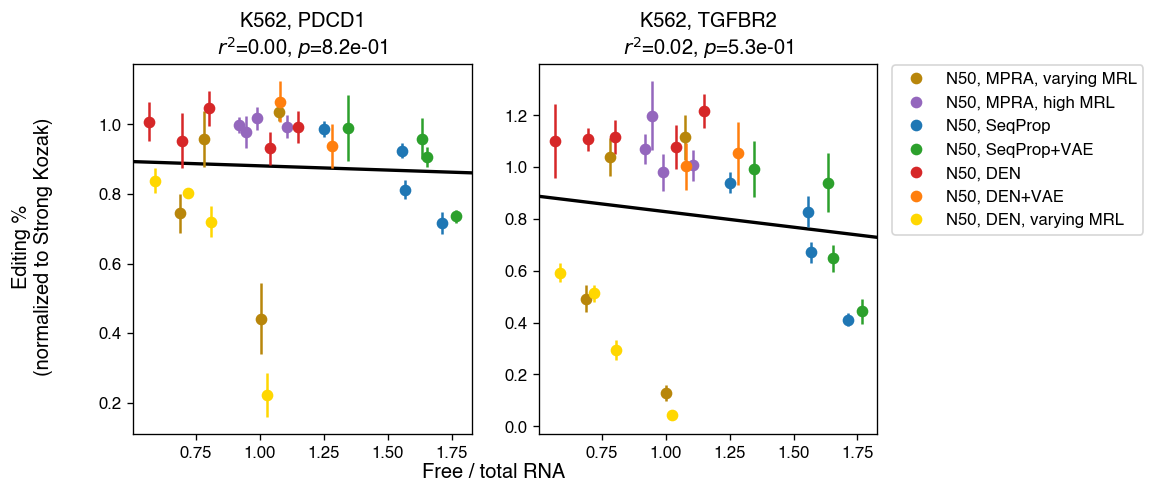

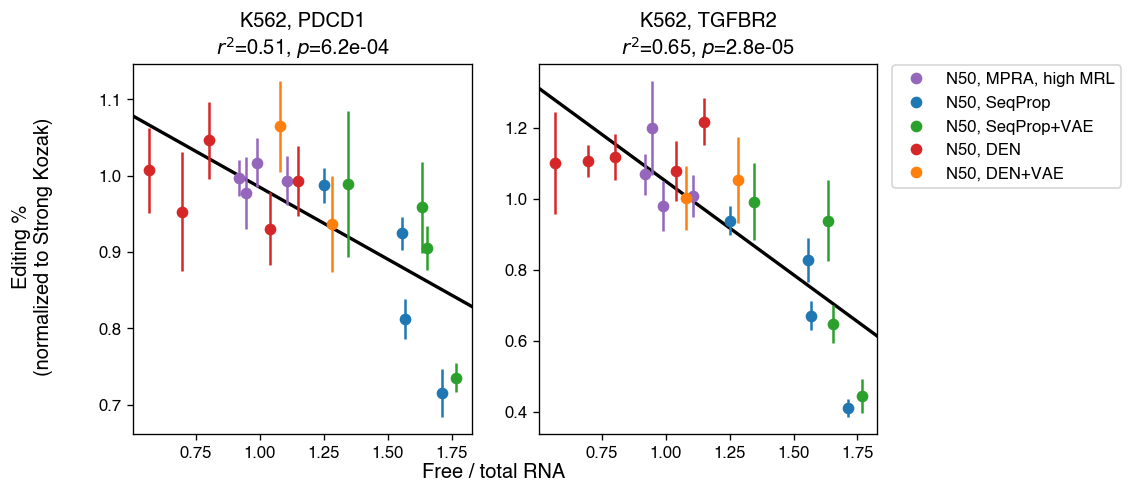

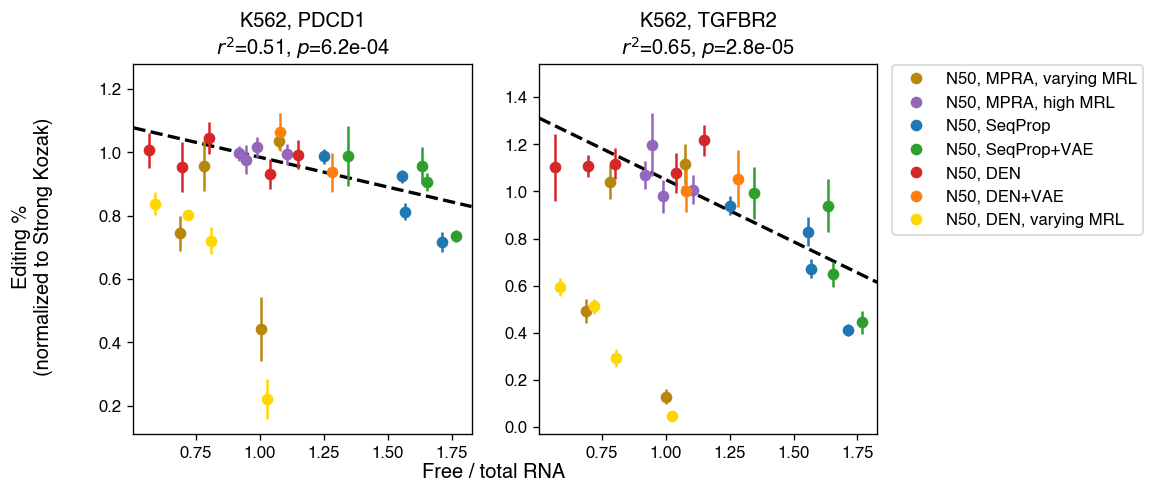

In [38]:
fig, ax = plot_vs_predicted_mrl(
    df=polprof_df,
    col_x='free_to_total',
    xlabel='Free / total RNA',
    linreg=True,
)
fig.savefig('free_to_total_vs_predicted_MRL_all_designs.pdf', bbox_inches='tight')

fig, ax = plot_vs_predicted_mrl(
    df=polprof_df,
    col_x='free_to_total',
    xlabel='Free / total RNA',
    seq_ids_to_plot=seq_ids_no_var,
)
fig.savefig('free_to_total_vs_predicted_MRL_max_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=polprof_df,
    col_x='free_to_total',
    xlabel='Free / total RNA',
)
fig.savefig('editing_vs_free_to_total_all_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=polprof_df,
    col_x='free_to_total',
    xlabel='Free / total RNA',
    seq_ids_to_plot=seq_ids_no_var,
)
fig.savefig('editing_vs_free_to_total_max_designs.pdf', bbox_inches='tight')

fig = plot_vs_editing(
    df=polprof_df,
    col_x='free_to_total',
    xlabel='Free / total RNA',
    linreg_seq_ids=seq_ids_no_var,
    ylim_upper_scale=1.1,
)
fig.savefig('editing_vs_free_to_total_all_designs_max_linreg.pdf', bbox_inches='tight')

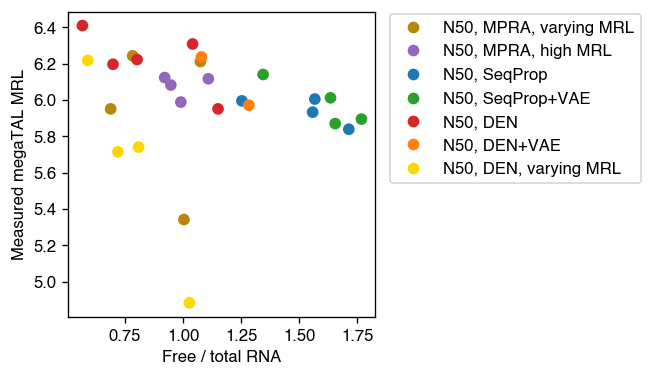

In [39]:
fig, ax = plot_vs_predicted_mrl(
    df=polprof_df,
    col_x='free_to_total',
    xlabel='Free / total RNA',
    pred_mrl_col='Measured MRL',
    pred_mrl_label='Measured megaTAL MRL',
    linreg=False,
)
fig.savefig('free_to_total_vs_measured_MRL_all_designs.pdf', bbox_inches='tight')

In [40]:
# Save to file to analyze motifs
polprof_sorted_df = polprof_df.sort_values('free_to_total')
n_seqs = 6

high_ftt_seq_ids = polprof_sorted_df.iloc[-n_seqs:].index
high_ftt_seqs_df = counts_df.loc[high_ftt_seq_ids, ['seq']]
# Save sequences to fasta
with open('high_ftt_seqs.fa', 'w') as f:
    for seq_id, seq in high_ftt_seqs_df.itertuples(index=True):
        f.write(f">{seq_id}\n{seq}\n")

low_ftt_seq_ids = polprof_sorted_df.iloc[:-n_seqs].index
low_ftt_seqs_df = counts_df.loc[low_ftt_seq_ids, ['seq']]
# Save sequences to fasta
with open('low_ftt_seqs.fa', 'w') as f:
    for seq_id, seq in low_ftt_seqs_df.itertuples(index=True):
        f.write(f">{seq_id}\n{seq}\n")

Run the following:

```
meme -oc meme_high_ftt_vs_low -objfun de -neg low_ftt_seqs.fa -hsfrac 0.666666 -rna -minw 5 -maxw 10 -nmotifs 10 high_ftt_seqs.fa
```